In [1]:
from Functions.utils import *

In [2]:
# Set the project directory and data paths

project_dir = Path.cwd()
data_dir = project_dir / 'Data'
Figures_dir = project_dir / 'Figures'

# Data paths
indu_10_data_file = data_dir / '10_Industry_Portfolios_clean.csv'
indu48_data_file = data_dir / '48_Industry_Portfolios.csv'
daily_indu48_file = data_dir / '48_Industry_Portfolios_Daily.csv'
RiskFree_file = data_dir / 'Risk_Free_Asset_Monthly.csv'
firm_size_data_file = data_dir / 'Firm_Size_10_Industry.csv'
firm_num_data_file = data_dir / 'Firm_Number_10_Industry.csv'

ff_factors_file = data_dir / 'F-F_Research_Data_Factors.csv'
five_ff_factors_file = data_dir / 'F-F_Research_Data_5_Factors_2x3.csv'
ff_mom_factor_file = data_dir / 'F-F_Momentum_Factor.csv'
daily_ff_factors_file = data_dir / 'F-F_Research_Data_Factors_daily.csv'

# Part A

In Part A, our approach involved generating a matrix of weights for each portfolio relative to its designated strategy. These weights were subsequently applied to the returns of individual industries to compute monthly portfolio returns. Following this, we conducted an analysis including various statistical parameters for each portfolio, alongside an evaluation of monthly returns distribution and the trajectory of portfolio value over time. These assessments were useful in assessing both the average and overall performance across different time frames, thereby facilitating conclusions regarding the efficacy of different strategies.

In [3]:
from Functions.functions_partA import *     # Import the functions created for part A
                      
# Load the data
data = pd.read_csv(indu_10_data_file, index_col= 'Date')

rf = pd.read_csv(RiskFree_file, index_col= 'Date')

firm_size = pd.read_csv(firm_size_data_file, index_col= 'Date')

firm_num = pd.read_csv(firm_num_data_file, index_col= 'Date')

# Calculate market capitalization for each industry
capitalization = firm_size * firm_num

For improved readability, functions were created in a separate file titled "functions_partA.py".

The index for the weights matrix is structured to mirror the portfolio weights at the conclusion of the preceding month. This arrangement facilitates easier alignment with the returns dataset. For instance, when considering the initial 60 observations, the weights obtained correspond to the portfolio utilized from June 1931 to July 1931. Consequently, these weights within the weight matrix are linked with the index for July 1931.

## Maximum Sharpe Ratio without Short-Selling Constraints Portfolio Startegy

In [4]:
window_size = 60
n = len(data)

# Preallocate memory for the results
w_max_sharpe = [None] * (n - window_size)

# Iterate over the DataFrame
for i in range(window_size, n):
    
    # Get the slice of the DataFrame that corresponds to the current window
    df_window = data.iloc[i-window_size:i]
    rf_window = rf.iloc[i-window_size:i]

    # Calculate the maximum Sharpe ratio for the current window
    w = max_sharpe(df_window, rf_window)

    # Assign the result to the corresponding position in the list
    w_max_sharpe[i - window_size] = w

# Convert the list to a DataFrame
w_max_sharpe = pd.DataFrame(w_max_sharpe, columns=data.columns, index=data.index[window_size:])

## Maximum Sharpe Ratio with Short-Selling Constraints Portfolio Startegy

In [5]:
# Create an empty list to store the results
w_max_sharpe_short_sell = [None] * (n - window_size)

# Iterate over the range of window_size to n
for i in range(window_size, n):

    # Get the window of data and risk-free rate
    df_window = data.iloc[i-window_size:i]
    rf_window = rf.iloc[i-window_size:i]

    # Call the max_sharpe_short_sell function to calculate the weights
    w = max_sharpe_short_sell(df_window, rf_window)

    # Store the weights in the list
    w_max_sharpe_short_sell[i - window_size] = w

# Convert the list of weights to a DataFrame with appropriate columns and index
w_max_sharpe_short_sell = pd.DataFrame(w_max_sharpe_short_sell, columns=data.columns, index=data.index[window_size:])

## Inverse Variance Weighted Portfolio Strategy

In [6]:
# Create a list to store the inverse variance values
w_inv_var = [None] * (n - window_size)

# Iterate over the range of window_size to n
for i in range(window_size, n):
    # Get the window of data from the dataframe
    df_window = data.iloc[i-window_size:i]

    # Calculate the inverse variance using the inv_var function
    w = inv_var(df_window)

    # Store the calculated inverse variance in the list
    w_inv_var[i - window_size] = w

# Convert the list of inverse variance values into a DataFrame
w_inv_var = pd.DataFrame(w_inv_var, columns=data.columns, index=data.index[window_size:])

## Inverse Volatility Weighted Portfolio Strategy

In [7]:
# Create a list to store the inverse volatility values
w_inv_vol = [None] * (n - window_size)

# Iterate over the range of window_size to n
for i in range(window_size, n):
    # Get the window of data from the dataframe
    df_window = data.iloc[i-window_size:i]

    # Calculate the inverse volatility using the inv_vol function
    w = inv_vol(df_window)

    # Store the calculated inverse volatility in the list
    w_inv_vol[i - window_size] = w

# Convert the list of inverse volatility values into a DataFrame
w_inv_vol = pd.DataFrame(w_inv_vol, columns=data.columns, index=data.index[window_size:])

## Equally Weighted Portfolio Strategy

In [8]:
# Create a new dataframe called 'w_eq' using the 'equally_w' function
# The dataframe is created using the 'data' dataframe, with the first 'window_size' rows removed
# The columns and index of the new dataframe are the same as the 'data' dataframe
w_eq = pd.DataFrame(equally_w(data)[window_size:], columns=data.columns, index=data.index[window_size:])

## Market Capitalization Weighted Portfolio Strategy

In [9]:
# Create a list to store the weighted market capitalization values
w_mrkt_cap = [None] * (n - window_size)

# Iterate over the range of window_size to n
for i in range(window_size, n):
    # Get the subset of firm_size dataframe for the current window
    df_size = firm_size.iloc[i-window_size:i]

    # Calculate the weighted market capitalization using the mrkt_cap function
    w = mrkt_cap(capitalization.iloc[i-window_size:i])

    # Store the calculated weighted market capitalization in the list
    w_mrkt_cap[i - window_size] = w

# Create a DataFrame from the list of weighted market capitalization values
w_mrkt_cap = pd.DataFrame(w_mrkt_cap, columns=firm_size.columns, index=firm_size.index[window_size:])

## Minimum Variance Portfolio Startegy

In [10]:
# Create an empty list to store the results
w_min_var = [None] * (n - window_size)

# Iterate over the range from window_size to n
for i in range(window_size, n):
    # Get the window of data from the dataframe
    df_window = data.iloc[i-window_size:i]

    # Calculate the minimum variance portfolio weights using the min_var function
    w = min_var(df_window)

    # Store the weights in the w_min_var list
    w_min_var[i - window_size] = w

# Convert the list of weights to a DataFrame with column names and index
w_min_var = pd.DataFrame(w_min_var, columns=data.columns, index=data.index[window_size:])

In the following sections, we compute the performance of each portfolio and generate relevant statistics. To enhance readability, the distributions of individual returns and portfolio values over time are directly saved within the "Figures" file.

## July 1931 - December 2023

In [11]:
start_date = '1931-07'
end_date = '2023-12'

# Calculate the performance of the portfolios
a1_results_1931 = performance(w_max_sharpe, data, rf, start_date, end_date, 'Max Sharpe')
a2_results_1931 = performance(w_max_sharpe_short_sell, data, rf, start_date, end_date, 'Max Sharpe (No Short)')
a3_results_1931 = performance(w_inv_var, data, rf, start_date, end_date, 'Inverse Variance')
a4_results_1931 = performance(w_inv_vol, data, rf, start_date, end_date, 'Inverse Volatility')
a5_results_1931 = performance(w_eq, data, rf, start_date, end_date, 'Equally Weighted')
a6_results_1931 = performance(w_mrkt_cap, data, rf, start_date, end_date, 'Market Cap Weighted')
a7_results_1931 = performance(w_min_var, data, rf, start_date, end_date, 'Minimum Variance')

In [12]:
# Concatenate the statistics into a single DataFrame
stats_1931 = pd.concat([a1_results_1931['Statistics'], 
                        a2_results_1931['Statistics'], 
                        a3_results_1931['Statistics'], 
                        a4_results_1931['Statistics'], 
                        a5_results_1931['Statistics'], 
                        a6_results_1931['Statistics'], 
                        a7_results_1931['Statistics']])

In [13]:
# Display the statistics
stats_1931

Arithmetic Mean (%)  Geometric Mean (%)  \
Max Sharpe                         -172.09               26.98   
Max Sharpe (No Short)                11.93               10.79   
Inverse Variance                     11.68               10.90   
Inverse Volatility                   11.92               11.03   
Equally Weighted                     12.14               11.12   
Market Cap Weighted                  11.64               10.49   
Minimum Variance                      9.10                8.64   

                       Total Return (%)  Portfolio Value ($)  \
Max Sharpe                 3.942109e+11         3.942109e+09   
Max Sharpe (No Short)      1.308196e+06         1.308296e+04   
Inverse Variance           1.428072e+06         1.428172e+04   
Inverse Volatility         1.591642e+06         1.591742e+04   
Equally Weighted           1.726912e+06         1.727012e+04   
Market Cap Weighted        1.015737e+06         1.015837e+04   
Minimum Variance           2.135558e+05         2.136560e+03   

                       Standard Deviation (%)  Min Return (monthly) (%)  \
Max Sharpe                            1351.13                 -12611.37   
Max Sharpe (No Short)                   18.14                    -26.82   
Inverse Variance                        16.14                    -27.81   
Inverse Volatility                      16.86                    -28.58   
Equally Weighted                        17.65                    -29.38   
Market Cap Weighted                     18.07                    -28.98   
Minimum Variance                        12.50                    -17.66   

                       Max Return (monthly) (%)  Sharpe Ratio  
Max Sharpe                              1065.71       -0.1297  
Max Sharpe (No Short)                     43.46        0.4802  
Inverse Variance                          36.78        0.5244  
Inverse Volatility                        39.06        0.5160  
Equally Weighted                          41.26        0.5055  
Market Cap Weighted                       37.86        0.4664  
Minimum Variance                          18.15        0.4709

In [14]:
%%capture
# Creating monthly returns distribution plots for each portfolio
plot_returns(a1_results_1931['Monthly Returns'], 'Max Sharpe', lim = 2, path='Figures/Part A/1931-2023/Returns_Max_Sharpe_1931.png')
plot_returns(a2_results_1931['Monthly Returns'], 'Max Sharpe (No Short)', lim = 0.2, path='Figures/Part A/1931-2023/Returns_Max_Sharpe_No_Short_1931.png')
plot_returns(a3_results_1931['Monthly Returns'], 'Inverse Variance', lim = 0.2, path='Figures/Part A/1931-2023/Returns_Inv_Var_1931.png')
plot_returns(a4_results_1931['Monthly Returns'], 'Inverse Volatility', lim = 0.2, path='Figures/Part A/1931-2023/Returns_Inv_Vol_1931.png')
plot_returns(a5_results_1931['Monthly Returns'], 'Equally Weighted', lim = 0.2, path='Figures/Part A/1931-2023/Returns_Equally_Weighted_1931.png')
plot_returns(a6_results_1931['Monthly Returns'], 'Market Cap Weighted', lim = 0.2, path='Figures/Part A/1931-2023/Returns_Market_Cap_Weighted_1931.png')
plot_returns(a7_results_1931['Monthly Returns'], 'Minimum Variance', lim = 0.2, path='Figures/Part A/1931-2023/Returns_Minimum_Variance_1931.png')

In [15]:
%%capture
# Creating portfolio value plots for each portfolio
plot_pf_val(a1_results_1931['Portfolio Value'], 'Max Sharpe', path='Figures/Part A/1931-2023/Pf_Val_Max_Sharpe_1931.png')
plot_pf_val(a2_results_1931['Portfolio Value'], 'Max Sharpe (No Short)', path='Figures/Part A/1931-2023/Pf_Val_Max_Sharpe_No_Short_1931.png')
plot_pf_val(a3_results_1931['Portfolio Value'], 'Inverse Variance', path='Figures/Part A/1931-2023/Pf_Val_Inv_Var_1931.png')
plot_pf_val(a4_results_1931['Portfolio Value'], 'Inverse Volatility', path='Figures/Part A/1931-2023/Pf_Val_Inv_Vol_1931.png')
plot_pf_val(a5_results_1931['Portfolio Value'], 'Equally Weighted', path='Figures/Part A/1931-2023/Pf_Val_Equally_Weighted_1931.png')
plot_pf_val(a6_results_1931['Portfolio Value'], 'Market Cap Weighted', path='Figures/Part A/1931-2023/Pf_Val_Market_Cap_Weighted_1931.png')
plot_pf_val(a7_results_1931['Portfolio Value'], 'Minimum Variance', path='Figures/Part A/1931-2023/Pf_Val_Minimum_Variance_1931.png')

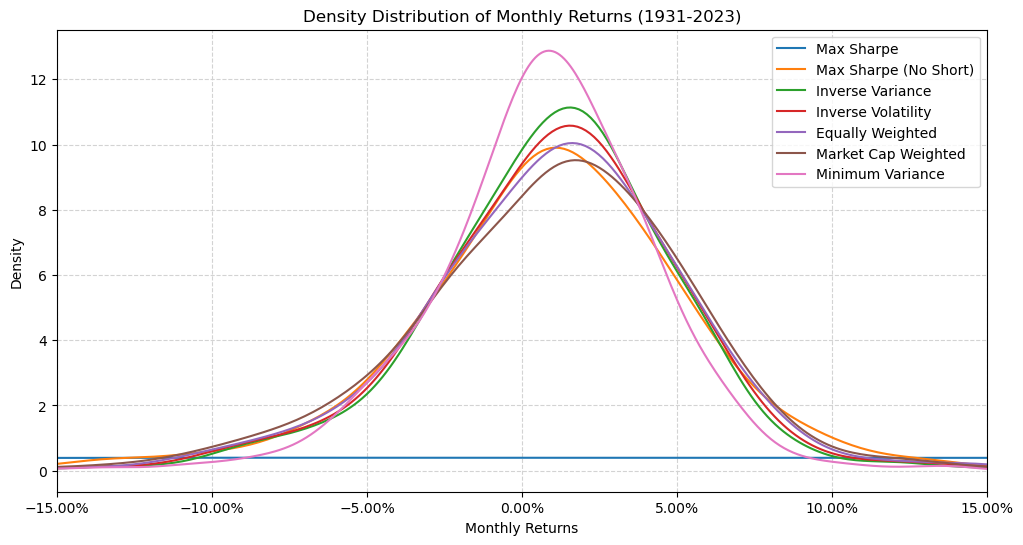

In [16]:
# Concatenate the monthly returns of each portfolio into a single DataFrame
all_monthly_rets_1931 = pd.concat([a1_results_1931["Monthly Returns"], 
                                   a2_results_1931["Monthly Returns"],
                                   a3_results_1931["Monthly Returns"], 
                                   a4_results_1931["Monthly Returns"],
                                   a5_results_1931["Monthly Returns"],
                                   a6_results_1931["Monthly Returns"],
                                   a7_results_1931["Monthly Returns"]],
                                   axis=1)

# Plot the density of each portfolio's monthly returns
all_monthly_rets_1931.plot(kind='kde', figsize=(12, 6))

plt.grid(color='lightgray', linestyle='--')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=2))
plt.xlim(-0.15,0.15)

plt.title('Density Distribution of Monthly Returns (1931-2023)')
plt.xlabel('Monthly Returns')
plt.ylabel('Density')
plt.legend()

plt.savefig('Figures/Part A/1931-2023/Returns_1931.png', bbox_inches='tight')
plt.show()

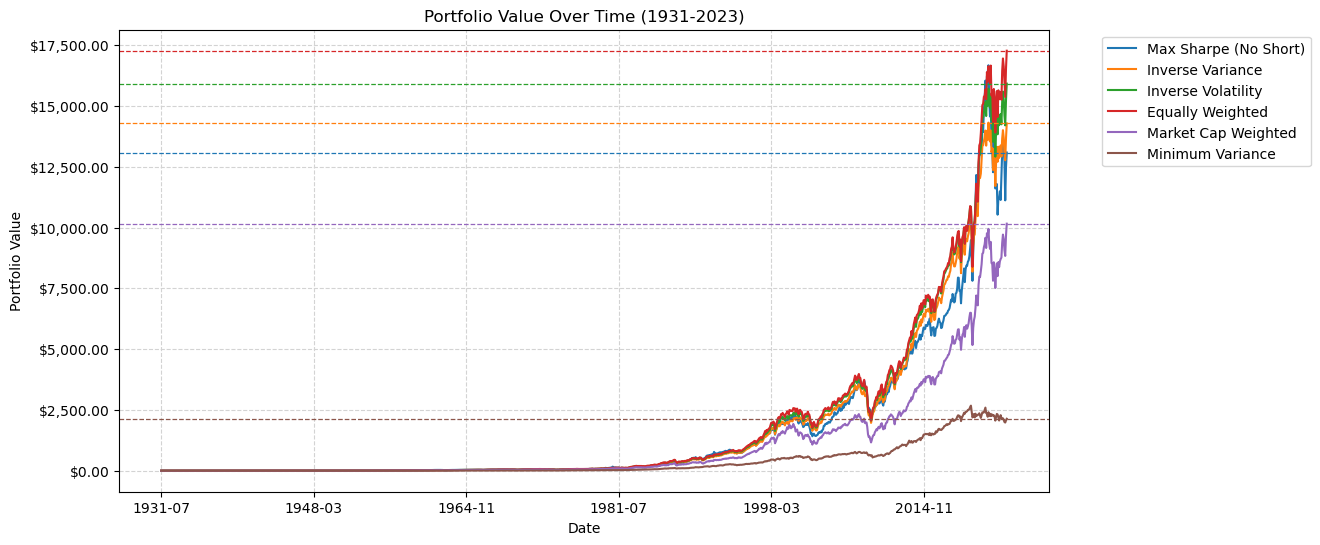

In [17]:
# Concatenate the portfolio value of each portfolio into a single DataFrame
all_pf_val_1931 = pd.concat([a2_results_1931["Portfolio Value"],
                             a3_results_1931["Portfolio Value"],
                             a4_results_1931["Portfolio Value"],
                             a5_results_1931["Portfolio Value"],
                             a6_results_1931["Portfolio Value"],
                             a7_results_1931["Portfolio Value"]],
                             axis=1)

# Plot each portfolio's value over time
ax = all_pf_val_1931.plot(figsize=(12, 6))

# Get the color of each line in the plot
line_colors = [line.get_color() for line in ax.get_lines()]

# Add horizontal lines at the ending values of each series
for i, column in enumerate(all_pf_val_1931.columns):
    plt.axhline(y=all_pf_val_1931[column].iloc[-1], color=line_colors[i], linestyle='--', linewidth=0.9)

plt.grid(color='lightgray', linestyle='--')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))

plt.title('Portfolio Value Over Time (1931-2023)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('Figures/Part A/1931-2023/Pf_Val_1931.png', bbox_inches='tight')
plt.show()

The maximizing Sharpe ratio strategy has been excluded from this graph due to its significantly larger value, rendering it impractical to plot alongside the other strategies.

## January 1990 - December 2023

In [18]:
start_date = '1990-01'
end_date = '2023-12'

# Calculate the performance of the portfolios
a1_results_1990 = performance(w_max_sharpe, data, rf, start_date, end_date, 'Max Sharpe')
a2_results_1990 = performance(w_max_sharpe_short_sell, data, rf, start_date, end_date, 'Max Sharpe (No Short)')
a3_results_1990 = performance(w_inv_var, data, rf, start_date, end_date, 'Inverse Variance')
a4_results_1990 = performance(w_inv_vol, data, rf, start_date, end_date, 'Inverse Volatility')
a5_results_1990 = performance(w_eq, data, rf, start_date, end_date, 'Equally Weighted')
a6_results_1990 = performance(w_mrkt_cap, data, rf, start_date, end_date, 'Market Cap Weighted')
a7_results_1990 = performance(w_min_var, data, rf, start_date, end_date, 'Minimum Variance')

In [19]:
# Concatenate the statistics into a single DataFrame
stats_1990 = pd.concat([a1_results_1990['Statistics'], 
                   a2_results_1990['Statistics'], 
                   a3_results_1990['Statistics'], 
                   a4_results_1990['Statistics'], 
                   a5_results_1990['Statistics'], 
                   a6_results_1990['Statistics'], 
                   a7_results_1990['Statistics']])

In [20]:
# Display the statistics
stats_1990

Arithmetic Mean (%) Geometric Mean (%)  \
Max Sharpe                          -16.48                N/A   
Max Sharpe (No Short)                10.49               9.71   
Inverse Variance                     10.87              10.46   
Inverse Volatility                   11.11              10.64   
Equally Weighted                     11.40              10.83   
Market Cap Weighted                  11.13              10.41   
Minimum Variance                      8.63               8.16   

                       Total Return (%)  Portfolio Value ($)  \
Max Sharpe                      -142.54                -0.43   
Max Sharpe (No Short)           2235.96                23.36   
Inverse Variance                2844.06                29.44   
Inverse Volatility              3007.63                31.08   
Equally Weighted                3199.12                32.99   
Market Cap Weighted             2800.56                29.01   
Minimum Variance                1340.30                14.40   

                       Standard Deviation (%)  Min Return (monthly) (%)  \
Max Sharpe                             246.47                  -1275.65   
Max Sharpe (No Short)                   15.41                    -13.71   
Inverse Variance                        13.23                    -15.79   
Inverse Volatility                      13.80                    -16.59   
Equally Weighted                        14.61                    -17.46   
Market Cap Weighted                     15.31                    -17.10   
Minimum Variance                        12.28                    -14.13   

                       Max Return (monthly) (%)  Sharpe Ratio  
Max Sharpe                               610.95       -0.0773  
Max Sharpe (No Short)                     16.61        0.5143  
Inverse Variance                          12.64        0.6276  
Inverse Volatility                        13.64        0.6190  
Equally Weighted                          15.00        0.6046  
Market Cap Weighted                       13.66        0.5592  
Minimum Variance                           9.70        0.4938

In [21]:
%%capture
# Creating monthly returns distribution plots for each portfolio
plot_returns(a1_results_1990['Monthly Returns'], 'Max Sharpe', lim = 2, path='Figures/Part A/1990-2023/Returns_Max_Sharpe_1990.png')
plot_returns(a2_results_1990['Monthly Returns'], 'Max Sharpe (No Short)', lim = 0.2, path='Figures/Part A/1990-2023/Returns_Max_Sharpe_No_Short_1990.png')
plot_returns(a3_results_1990['Monthly Returns'], 'Inverse Variance', lim = 0.2, path='Figures/Part A/1990-2023/Returns_Inv_Var_1990.png')
plot_returns(a4_results_1990['Monthly Returns'], 'Inverse Volatility', lim = 0.2, path='Figures/Part A/1990-2023/Returns_Inv_Vol_1990.png')
plot_returns(a5_results_1990['Monthly Returns'], 'Equally Weighted', lim = 0.2, path='Figures/Part A/1990-2023/Returns_Equally_Weighted_1990.png')
plot_returns(a6_results_1990['Monthly Returns'], 'Market Cap Weighted', lim = 0.2, path='Figures/Part A/1990-2023/Returns_Market_Cap_Weighted_1990.png')
plot_returns(a7_results_1990['Monthly Returns'], 'Minimum Variance', lim = 0.2, path='Figures/Part A/1990-2023/Returns_Minimum_Variance_1990.png')

In [22]:
%%capture
# Creating portfolio value plots for each portfolio
plot_pf_val(a1_results_1990['Portfolio Value'], 'Max Sharpe', path='Figures/Part A/1990-2023/Pf_Val_Max_Sharpe_1990.png')
plot_pf_val(a2_results_1990['Portfolio Value'], 'Max Sharpe (No Short)', path='Figures/Part A/1990-2023/Pf_Val_Max_Sharpe_No_Short_1990.png')
plot_pf_val(a3_results_1990['Portfolio Value'], 'Inverse Variance', path='Figures/Part A/1990-2023/Pf_Val_Inv_Var_1990.png')
plot_pf_val(a4_results_1990['Portfolio Value'], 'Inverse Volatility', path='Figures/Part A/1990-2023/Pf_Val_Inv_Vol_1990.png')
plot_pf_val(a5_results_1990['Portfolio Value'], 'Equally Weighted', path='Figures/Part A/1990-2023/Pf_Val_Equally_Weighted_1990.png')
plot_pf_val(a6_results_1990['Portfolio Value'], 'Market Cap Weighted', path='Figures/Part A/1990-2023/Pf_Val_Market_Cap_Weighted_1990.png')
plot_pf_val(a7_results_1990['Portfolio Value'], 'Minimum Variance', path='Figures/Part A/1990-2023/Pf_Val_Minimum_Variance_1990.png')

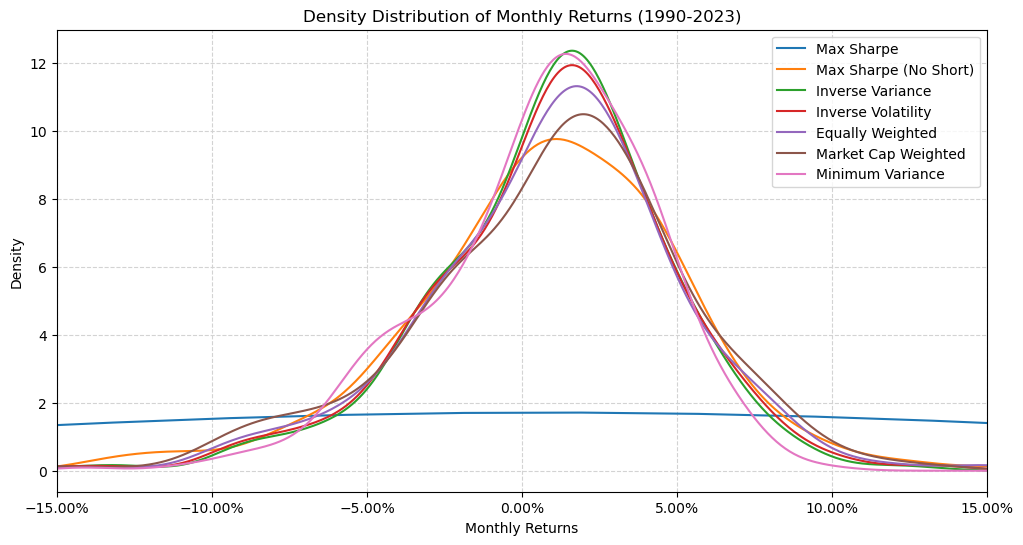

In [23]:
# Concatenate the monthly returns of each portfolio into a single DataFrame
all_monthly_rets_1990= pd.concat([a1_results_1990["Monthly Returns"], 
                                  a2_results_1990["Monthly Returns"],
                                  a3_results_1990["Monthly Returns"], 
                                  a4_results_1990["Monthly Returns"],
                                  a5_results_1990["Monthly Returns"],
                                  a6_results_1990["Monthly Returns"],
                                  a7_results_1990["Monthly Returns"]],
                                  axis=1)

# Plot the density of each portfolio's monthly returns
all_monthly_rets_1990.plot(kind='kde', figsize=(12, 6))

plt.grid(color='lightgray', linestyle='--')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=2))
plt.xlim(-0.15,0.15)

plt.title('Density Distribution of Monthly Returns (1990-2023)')
plt.xlabel('Monthly Returns')
plt.ylabel('Density')
plt.legend()

plt.savefig('Figures/Part A/1990-2023/Returns_1990.png', bbox_inches='tight')
plt.show()

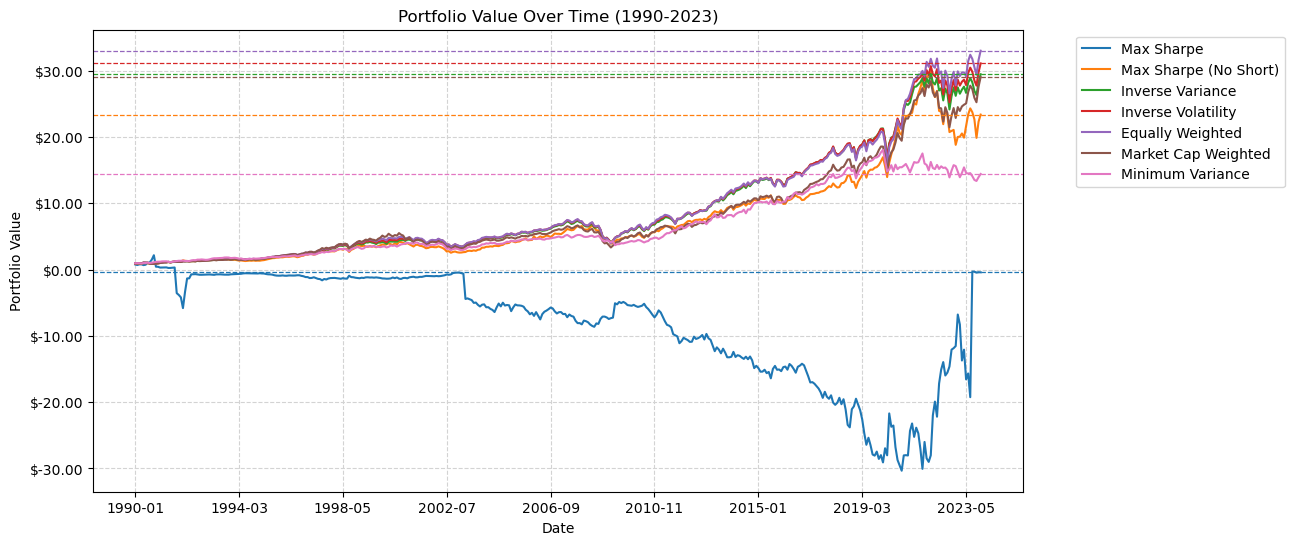

In [24]:
# Concatenate the portfolio value of each portfolio into a single DataFrame
all_pf_val_1990 = pd.concat([a1_results_1990["Portfolio Value"],
                             a2_results_1990["Portfolio Value"],
                             a3_results_1990["Portfolio Value"],
                             a4_results_1990["Portfolio Value"],
                             a5_results_1990["Portfolio Value"],
                             a6_results_1990["Portfolio Value"],
                             a7_results_1990["Portfolio Value"]],
                             axis=1)

# Plot the density of each portfolio's value over time
ax = all_pf_val_1990.plot(figsize=(12, 6))

# Get the color of each line in the plot
line_colors = [line.get_color() for line in ax.get_lines()]

# Add horizontal lines at the ending values of each series
for i, column in enumerate(all_pf_val_1990.columns):
    plt.axhline(y=all_pf_val_1990[column].iloc[-1], color=line_colors[i], linestyle='--', linewidth=0.9)

plt.grid(color='lightgray', linestyle='--')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))

plt.title('Portfolio Value Over Time (1990-2023)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('Figures/Part A/1990-2023/Pf_Val_1990.png', bbox_inches='tight')
plt.show()

## January 2000 - December 2023

In [25]:
start_date = '2000-01'
end_date = '2023-12'

# Calculate the performance of the portfolios
a1_results_2000 = performance(w_max_sharpe, data, rf, start_date, end_date, 'Max Sharpe')
a2_results_2000 = performance(w_max_sharpe_short_sell, data, rf, start_date, end_date, 'Max Sharpe (No Short)')
a3_results_2000 = performance(w_inv_var, data, rf, start_date, end_date, 'Inverse Variance')
a4_results_2000 = performance(w_inv_vol, data, rf, start_date, end_date, 'Inverse Volatility')
a5_results_2000 = performance(w_eq, data, rf, start_date, end_date, 'Equally Weighted')
a6_results_2000 = performance(w_mrkt_cap, data, rf, start_date, end_date, 'Market Cap Weighted')
a7_results_2000 = performance(w_min_var, data, rf, start_date, end_date, 'Minimum Variance')

In [26]:
# Concatenate the statistics into a single DataFrame
stats_2000 = pd.concat([a1_results_2000['Statistics'], 
                   a2_results_2000['Statistics'], 
                   a3_results_2000['Statistics'], 
                   a4_results_2000['Statistics'], 
                   a5_results_2000['Statistics'], 
                   a6_results_2000['Statistics'], 
                   a7_results_2000['Statistics']])

In [27]:
# Display the statistics
stats_2000.sort_values(by = 'Total Return (%)', ascending = False)

Arithmetic Mean (%)  Geometric Mean (%)  \
Inverse Variance                      9.14                8.51   
Inverse Volatility                    9.22                8.50   
Equally Weighted                      9.36                8.49   
Max Sharpe (No Short)                 8.85                7.90   
Market Cap Weighted                   8.52                7.50   
Minimum Variance                      6.76                6.13   
Max Sharpe                           30.21               -4.69   

                       Total Return (%)  Portfolio Value ($)  \
Inverse Variance                 610.08                 7.10   
Inverse Volatility               608.17                 7.08   
Equally Weighted                 606.86                 7.07   
Max Sharpe (No Short)            520.00                 6.20   
Market Cap Weighted              466.77                 5.67   
Minimum Variance                 316.67                 4.17   
Max Sharpe                       -68.44                 0.32   

                       Standard Deviation (%)  Min Return (monthly) (%)  \
Inverse Variance                        13.71                    -15.79   
Inverse Volatility                      14.37                    -16.59   
Equally Weighted                        15.35                    -17.46   
Max Sharpe (No Short)                   15.63                    -13.71   
Market Cap Weighted                     15.90                    -17.10   
Minimum Variance                        12.54                    -14.13   
Max Sharpe                             130.03                    -98.36   

                       Max Return (monthly) (%)  Sharpe Ratio  
Inverse Variance                          12.64        0.5481  
Inverse Volatility                        13.64        0.5285  
Equally Weighted                          15.00        0.5037  
Max Sharpe (No Short)                     15.32        0.4623  
Market Cap Weighted                       13.66        0.4337  
Minimum Variance                           8.51        0.4088  
Max Sharpe                               610.95        0.2198

In [28]:
%%capture

plot_returns(a1_results_2000['Monthly Returns'], 'Max Sharpe', lim = 2, path='Figures/Part A/2000-2023/Returns_Max_Sharpe_2000.png')
plot_returns(a2_results_2000['Monthly Returns'], 'Max Sharpe (No Short)', lim = 0.2, path='Figures/Part A/2000-2023/Returns_Max_Sharpe_No_Short_2000.png')
plot_returns(a3_results_2000['Monthly Returns'], 'Inverse Variance', lim = 0.2, path='Figures/Part A/2000-2023/Returns_Inv_Var_2000.png')
plot_returns(a4_results_2000['Monthly Returns'], 'Inverse Volatility', lim = 0.2, path='Figures/Part A/2000-2023/Returns_Inv_Vol_2000.png')
plot_returns(a5_results_2000['Monthly Returns'], 'Equally Weighted', lim = 0.2, path='Figures/Part A/2000-2023/Returns_Equally_Weighted_2000.png')
plot_returns(a6_results_2000['Monthly Returns'], 'Market Cap Weighted', lim = 0.2, path='Figures/Part A/2000-2023/Returns_Market_Cap_Weighted_2000.png')
plot_returns(a7_results_2000['Monthly Returns'], 'Minimum Variance', lim = 0.2, path='Figures/Part A/2000-2023/Returns_Minimum_Variance_2000.png')

In [29]:
%%capture
# Creating portfolio value plots for each portfolio
plot_pf_val(a1_results_2000['Portfolio Value'], 'Max Sharpe', path='Figures/Part A/2000-2023/Pf_Val_Max_Sharpe_2000.png')
plot_pf_val(a2_results_2000['Portfolio Value'], 'Max Sharpe (No Short)', path='Figures/Part A/2000-2023/Pf_Val_Max_Sharpe_No_Short_2000.png')
plot_pf_val(a3_results_2000['Portfolio Value'], 'Inverse Variance', path='Figures/Part A/2000-2023/Pf_Val_Inv_Var_2000.png')
plot_pf_val(a4_results_2000['Portfolio Value'], 'Inverse Volatility', path='Figures/Part A/2000-2023/Pf_Val_Inv_Vol_2000.png')
plot_pf_val(a5_results_2000['Portfolio Value'], 'Equally Weighted', path='Figures/Part A/2000-2023/Pf_Val_Equally_Weighted_2000.png')
plot_pf_val(a6_results_2000['Portfolio Value'], 'Market Cap Weighted', path='Figures/Part A/2000-2023/Pf_Val_Market_Cap_Weighted_2000.png')
plot_pf_val(a7_results_2000['Portfolio Value'], 'Minimum Variance', path='Figures/Part A/2000-2023/Pf_Val_Minimum_Variance_2000.png')

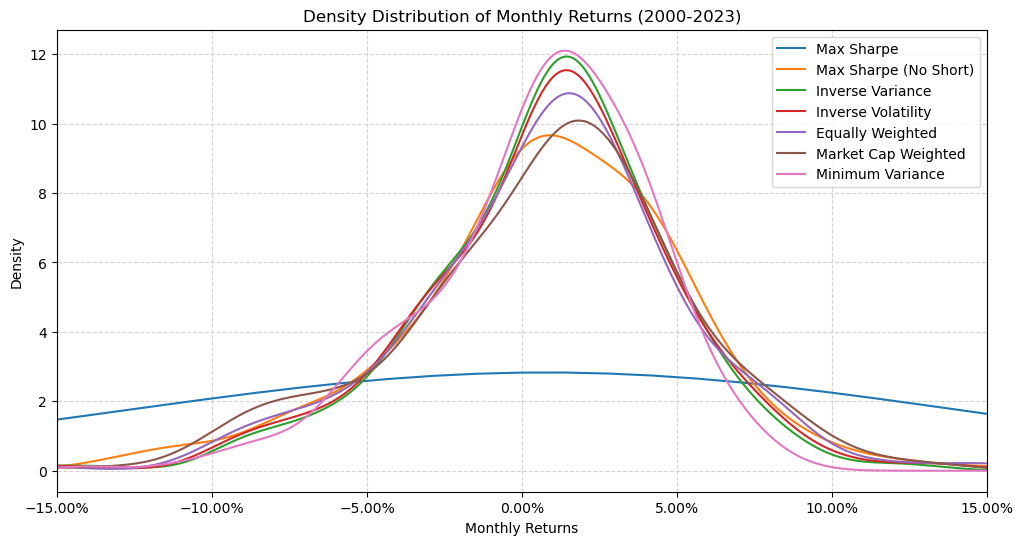

In [30]:
# Concatenate the monthly returns of each portfolio into a single DataFrame
all_monthly_rets_2000= pd.concat([a1_results_2000["Monthly Returns"], 
                                  a2_results_2000["Monthly Returns"],
                                  a3_results_2000["Monthly Returns"], 
                                  a4_results_2000["Monthly Returns"],
                                  a5_results_2000["Monthly Returns"],
                                  a6_results_2000["Monthly Returns"],
                                  a7_results_2000["Monthly Returns"]],
                                  axis=1)

# Plot the density of each column
all_monthly_rets_2000.plot(kind='kde', figsize=(12, 6))

plt.grid(color='lightgray', linestyle='--')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=2))
plt.xlim(-0.15,0.15)

plt.title('Density Distribution of Monthly Returns (2000-2023)')
plt.xlabel('Monthly Returns')
plt.ylabel('Density')
plt.legend()

plt.savefig('Figures/Part A/2000-2023/Returns_2000.png', bbox_inches='tight')
plt.show()

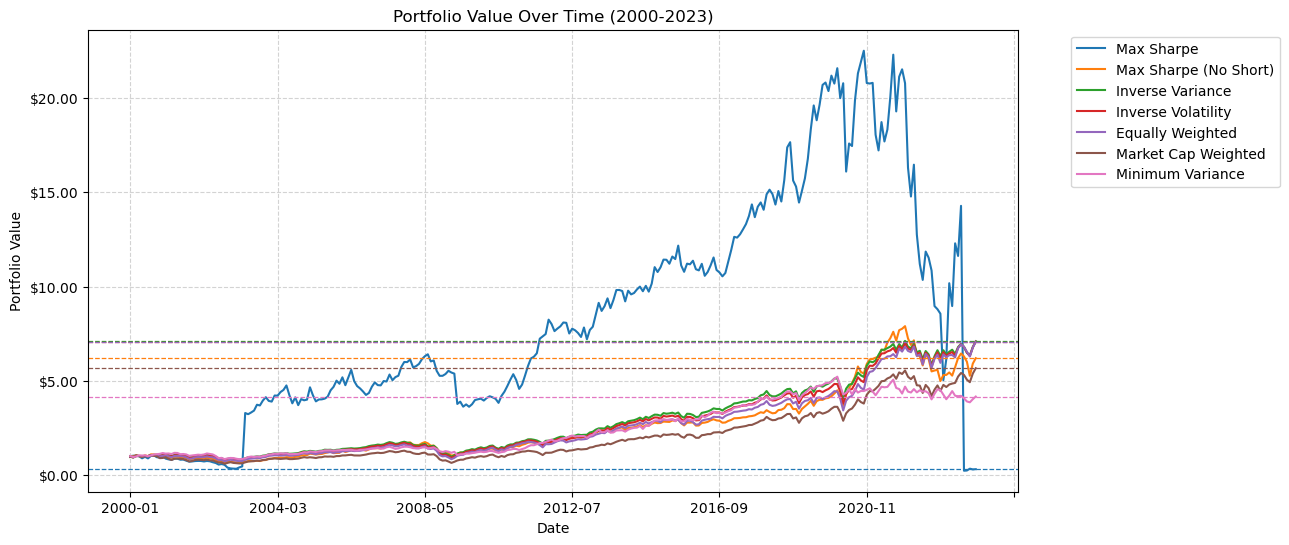

In [31]:
# Concatenate the portfolio value of each portfolio into a single DataFrame
all_pf_val_2000 = pd.concat([a1_results_2000["Portfolio Value"],
                             a2_results_2000["Portfolio Value"],
                             a3_results_2000["Portfolio Value"],
                             a4_results_2000["Portfolio Value"],
                             a5_results_2000["Portfolio Value"],
                             a6_results_2000["Portfolio Value"],
                             a7_results_2000["Portfolio Value"]],
                             axis=1)

# Plot the portfolio value of each portfolio over time
ax = all_pf_val_2000.plot(figsize=(12, 6))

# Get the color of each line in the plot
line_colors = [line.get_color() for line in ax.get_lines()]

# Add horizontal lines at the ending values of each series
for i, column in enumerate(all_pf_val_2000.columns):
    plt.axhline(y=all_pf_val_2000[column].iloc[-1], color=line_colors[i], linestyle='--', linewidth=0.9)

plt.grid(color='lightgray', linestyle='--')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))

plt.title('Portfolio Value Over Time (2000-2023)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('Figures/Part A/2000-2023/Pf_Val_2000.png', bbox_inches='tight')
plt.show()

# Part B

In [32]:
from Functions.functions_partB import *

## Data Prep

In [33]:
# Load the data 
indu48_data = pd.read_csv(indu48_data_file, skiprows=11, index_col=0, nrows=1171)
daily_indu48_data = pd.read_csv(daily_indu48_file, skiprows=9, index_col=0, nrows=25670, low_memory=False)
ff_factors = pd.read_csv(ff_factors_file, skiprows=3, index_col=0, nrows=1171)
five_ff_factors = pd.read_csv(five_ff_factors_file, skiprows=3, index_col=0, nrows=727)
ff_mom_factor = pd.read_csv(ff_mom_factor_file, skiprows=13, index_col=0, nrows=1165)
daily_ff_factors = pd.read_csv(daily_ff_factors_file, skiprows=4, index_col=0, nrows=25670, low_memory=False)
size48_data = pd.read_csv(indu48_data_file, skiprows=3738, index_col=0, nrows=1171)
n_firms48_data = pd.read_csv(indu48_data_file, skiprows=2563, index_col=0, nrows=1171)
mktcap48_data = n_firms48_data.mul(size48_data) # Market capitalization defined as the product of the average number of firms and the average size of the firms in the 48 industries
bm48_data = pd.read_csv(indu48_data_file, skiprows=4913, index_col=0, nrows=98)

In [34]:
# Make sure we have a datimeindex
indu48_data.index = pd.to_datetime(indu48_data.index, format='%Y%m') + pd.offsets.MonthEnd(0)
daily_ff_factors.index = pd.to_datetime(daily_ff_factors.index, format='%Y%m%d') + pd.offsets.MonthEnd(0)
daily_indu48_data.index = pd.to_datetime(daily_indu48_data.index, format='%Y%m%d') + pd.offsets.MonthEnd(0)
mktcap48_data.index = pd.to_datetime(mktcap48_data.index, format='%Y%m') + pd.offsets.MonthEnd(0)
ff_factors.index = pd.to_datetime(ff_factors.index, format='%Y%m') + pd.offsets.MonthEnd(0)
five_ff_factors.index = pd.to_datetime(five_ff_factors.index, format='%Y%m') + pd.offsets.MonthEnd(0)
ff_mom_factor.index = pd.to_datetime(ff_mom_factor.index, format='%Y%m') + pd.offsets.MonthEnd(0)

In [35]:
# Create the four factor model which adds the momentum factor to the three factor model
four_ff_factors = ff_factors.merge(ff_mom_factor, left_index=True, right_index=True)

In [36]:
# Replace -99.99 with NaN (-0.0 with NaN for market capitalization data)
daily_indu48_data.replace(-99.99, np.nan, inplace=True)
indu48_data.replace(-99.99, np.nan, inplace=True)
daily_ff_factors.replace(-99.99, np.nan, inplace=True)
bm48_data.replace(-99.99, np.nan, inplace=True)
ff_factors.replace(-99.99, np.nan, inplace=True)
five_ff_factors.replace(-99.99, np.nan, inplace=True)
four_ff_factors.replace(-99.99, np.nan, inplace=True)
mktcap48_data.replace(-0.0, np.nan, inplace=True)

In [37]:
# Calculate the excess returns
daily_excess_returns = daily_indu48_data.sub(daily_ff_factors['RF'].values, axis=0)
daily_excess_returns.index = pd.to_datetime(daily_excess_returns.index, format='%Y%m%d')

In [38]:
# Divide the data by 100 to convert it to percentages
daily_excess_returns = daily_excess_returns / 100
daily_ff_factors = daily_ff_factors / 100
indu48_data = indu48_data / 100
daily_indu48_data = daily_indu48_data / 100
ff_factors = ff_factors/100
five_ff_factors = five_ff_factors/100
four_ff_factors = four_ff_factors/100

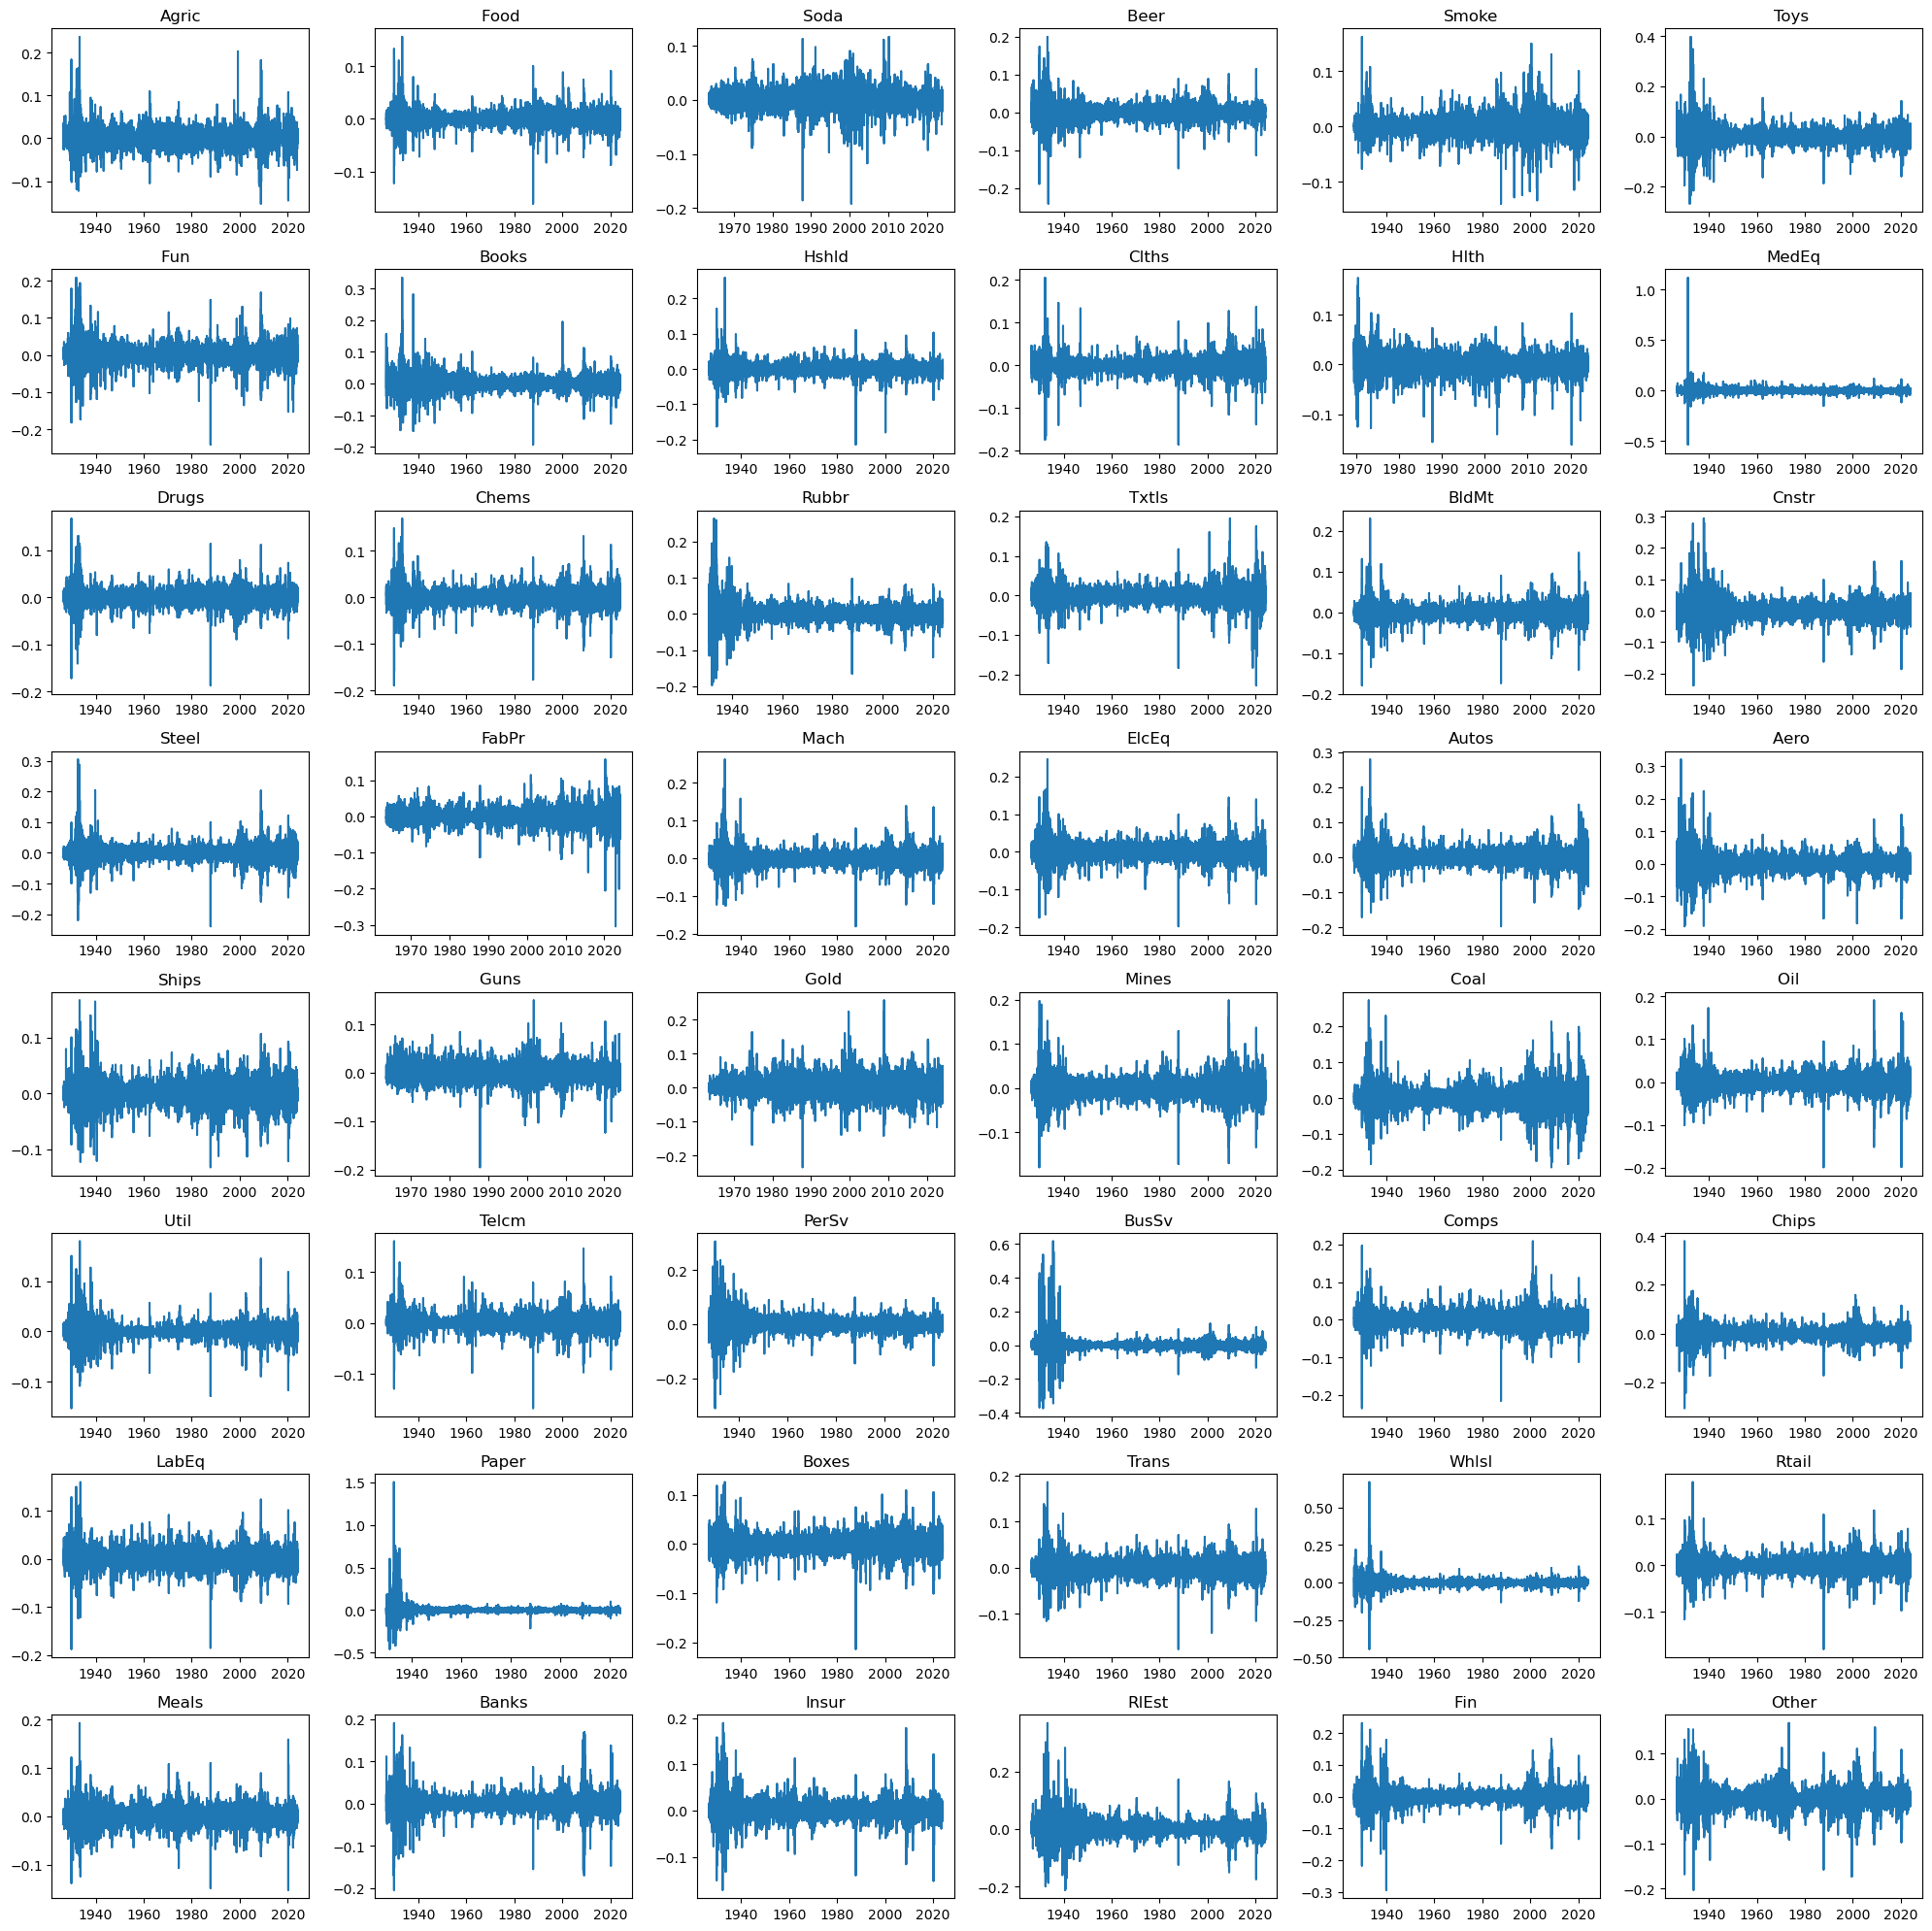

In [39]:
# Create a figure and axes with 8 rows and 6 columns
fig, axes = plt.subplots(8, 6, figsize=(20, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each column in the dataframe
for i, column in enumerate(daily_indu48_data.columns):
    # Plot the column on the corresponding subplot
    axes[i].plot(daily_indu48_data.index, daily_indu48_data[column])
    axes[i].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

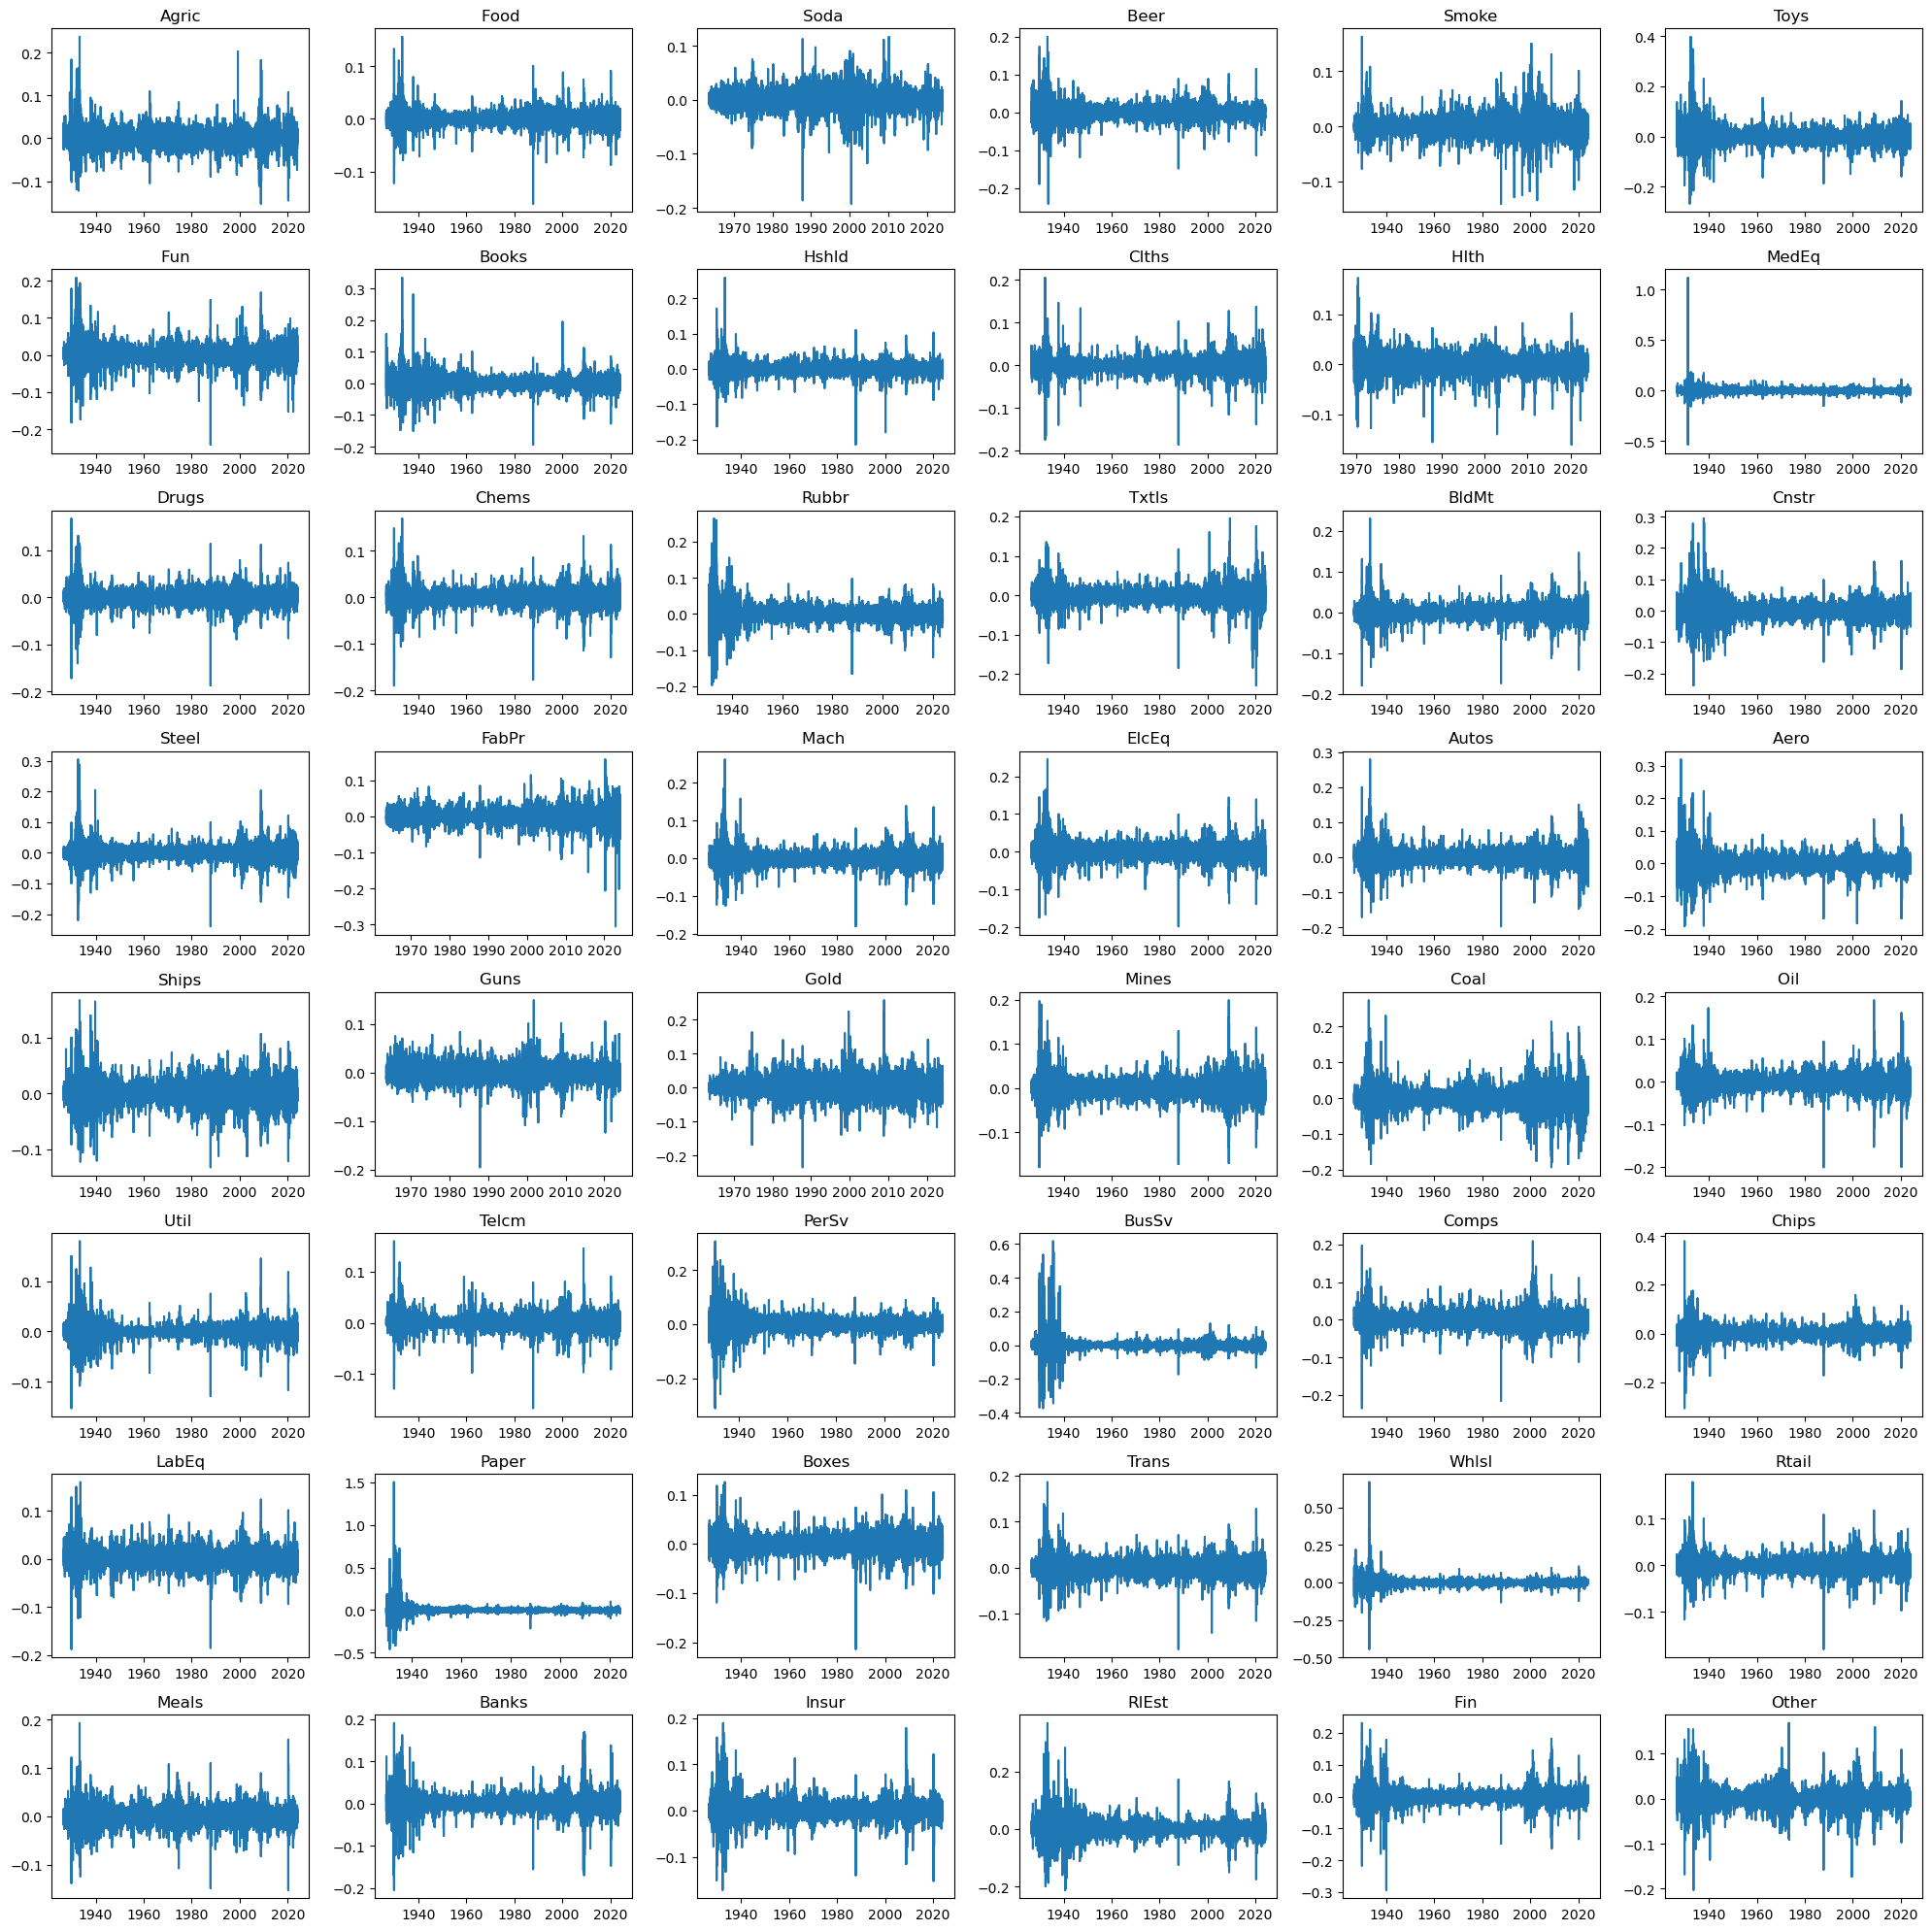

In [40]:
# Create a figure and axes with 8 rows and 6 columns
fig, axes = plt.subplots(8, 6, figsize=(20, 20))
axes = axes.flatten()

# Iterate over each column in the dataframe
for i, column in enumerate(daily_excess_returns.columns):
    # Plot the column on the corresponding subplot
    axes[i].plot(daily_excess_returns.index, daily_excess_returns[column])
    axes[i].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

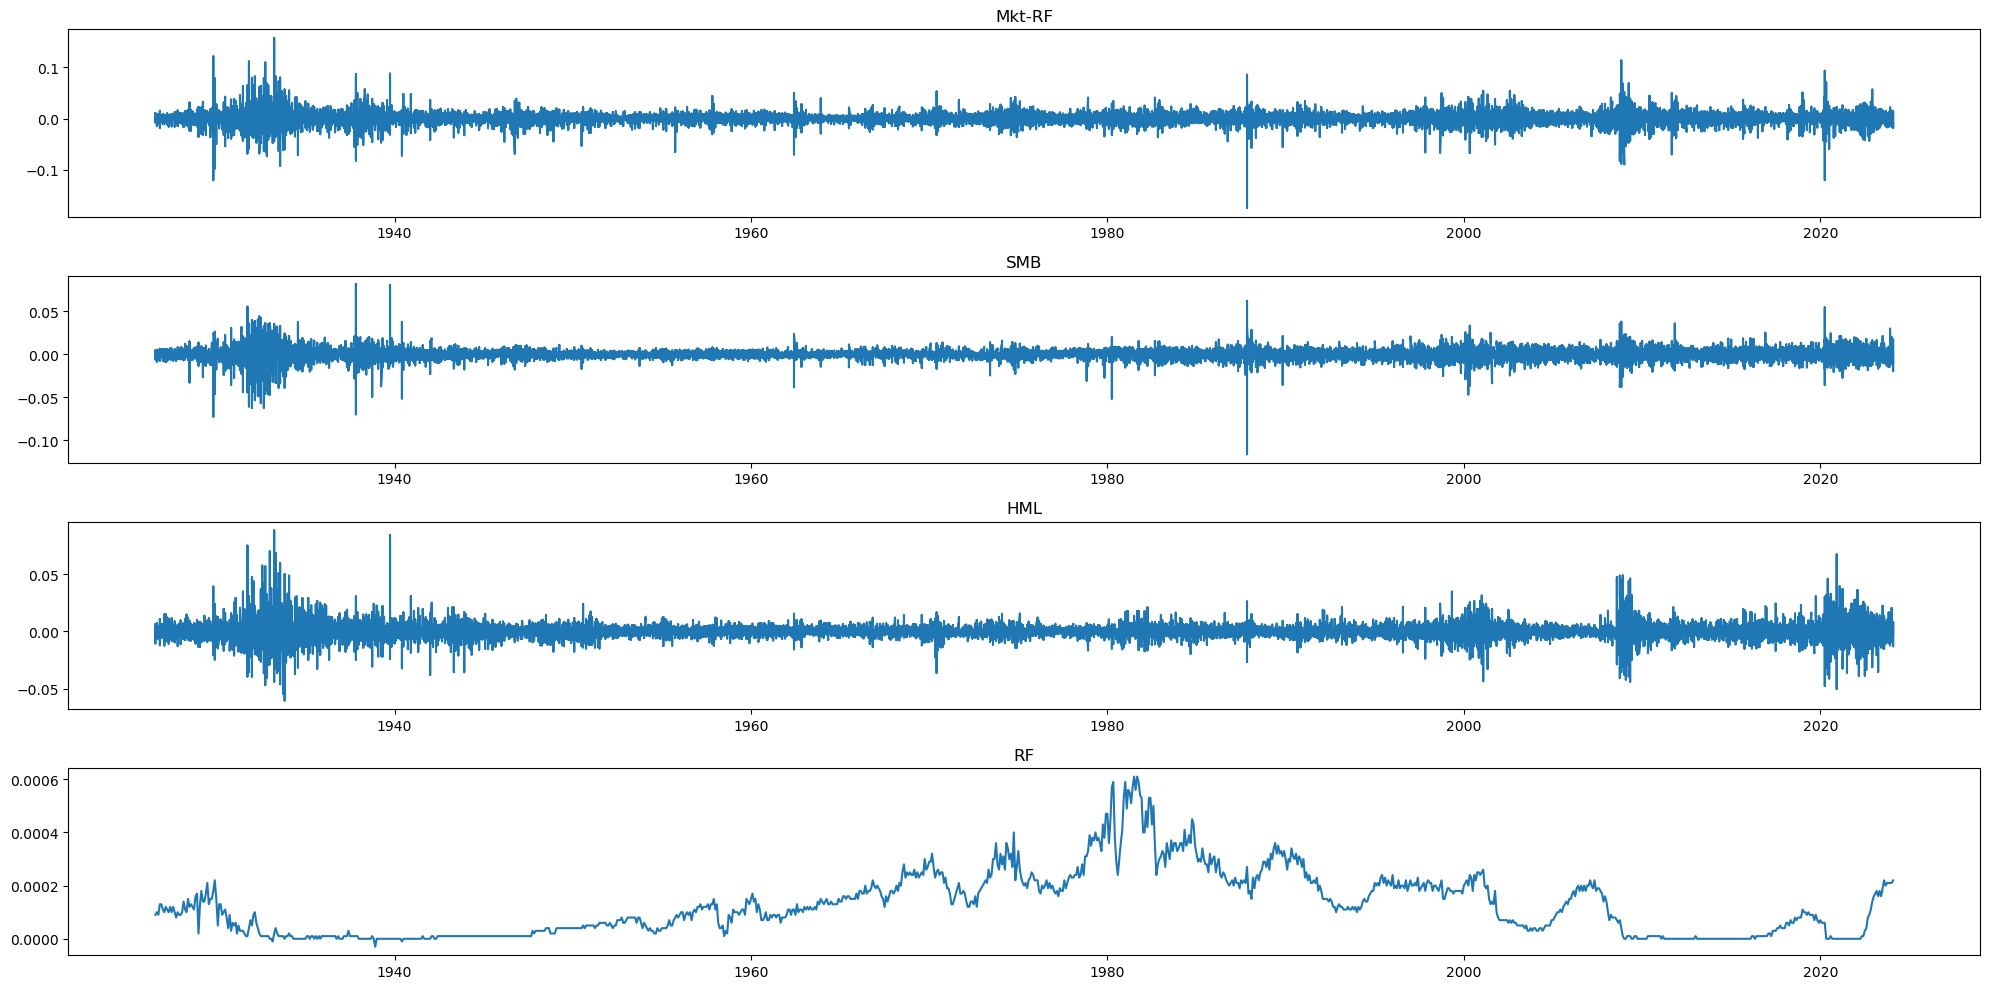

In [41]:
# Create a figure and axes with 8 rows and 6 columns
fig, axes = plt.subplots(4, 1, figsize=(20, 10))
axes = axes.flatten()

# Iterate over each column in the dataframe
for i, column in enumerate(daily_ff_factors.columns):
    # Plot the column on the corresponding subplot
    axes[i].plot(daily_ff_factors.index, daily_ff_factors[column])
    axes[i].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [42]:
# Calculate the betas
betas = [get_betas(daily_excess_returns, col, indu48_data, daily_ff_factors) for col in daily_excess_returns.columns]
betas = pd.concat([x for x in betas], axis=1)
betas.columns = daily_excess_returns.columns

In [43]:
# Calculate the idiosyncratic volatilities
idio_vols = [get_idio_vol(daily_excess_returns, col, indu48_data, daily_ff_factors) for col in daily_excess_returns.columns]
idio_vols = pd.concat([x for x in idio_vols], axis=1)
idio_vols.columns = daily_excess_returns.columns

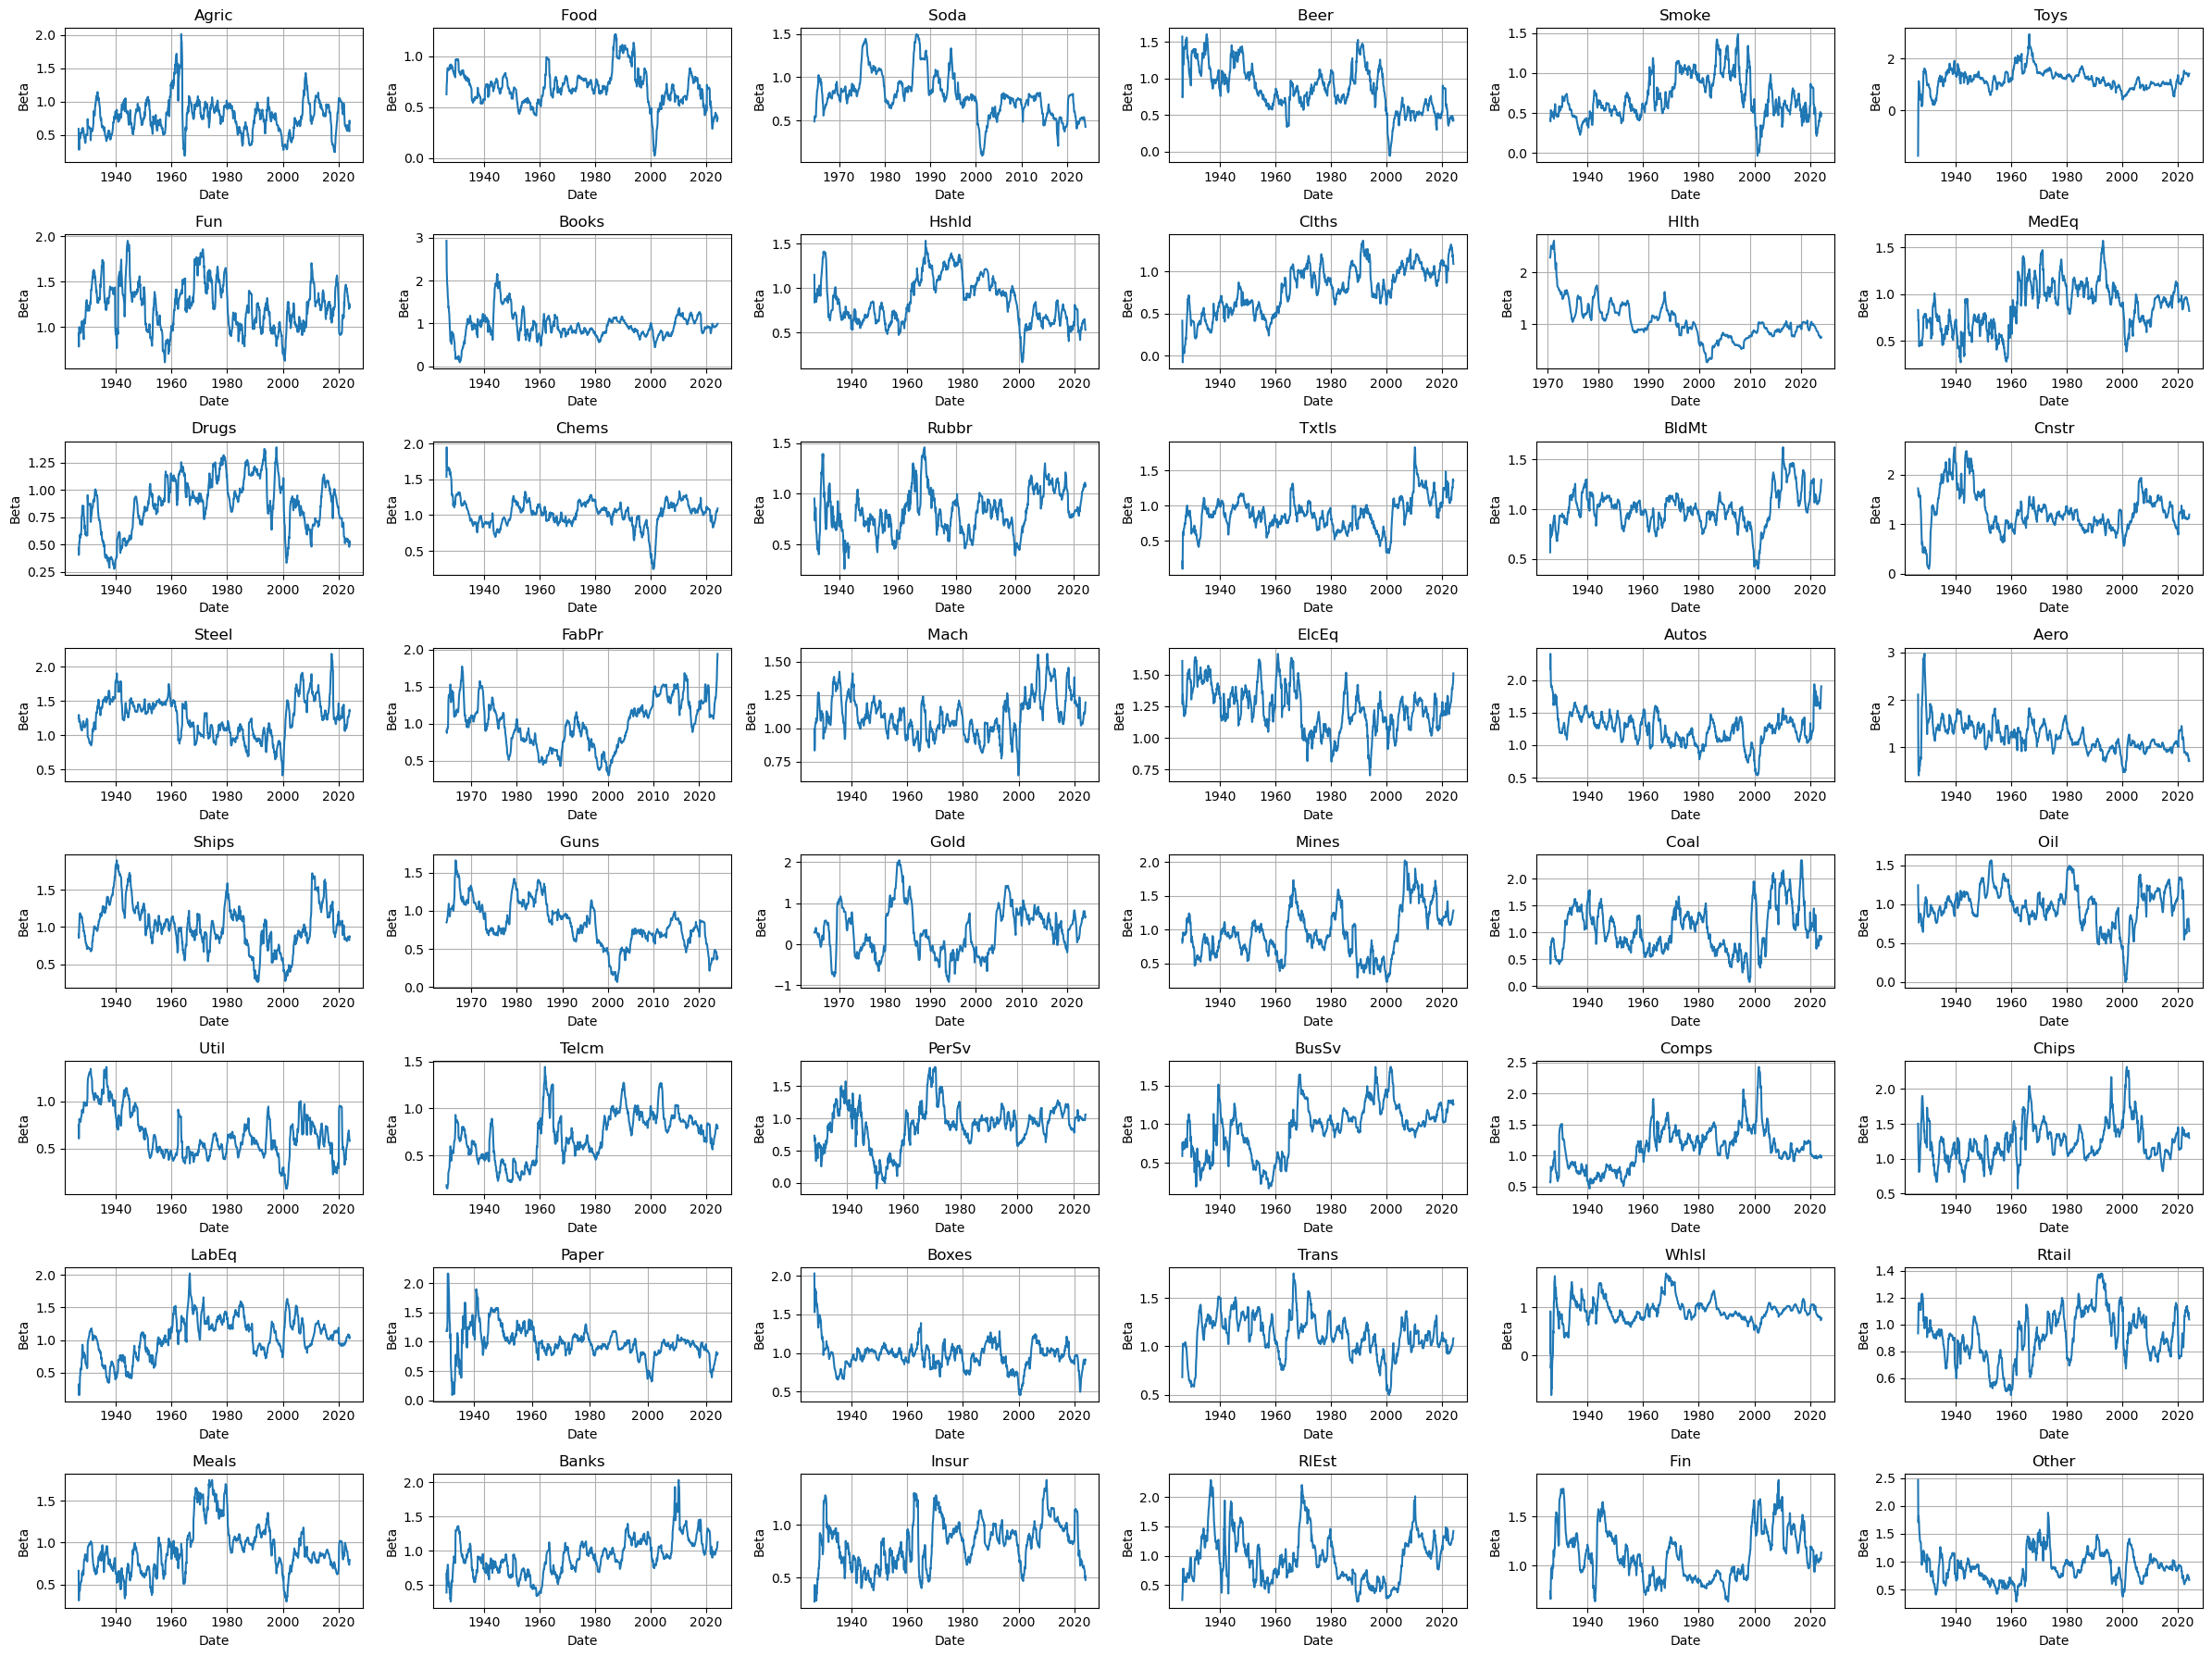

In [44]:
fig, axes = plt.subplots(8, 6, figsize=(24, 18))
axes = axes.flatten()

# Plot each betas series
for i, column in enumerate(betas.columns):
    axes[i].plot(betas.index, betas[column])
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Beta')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

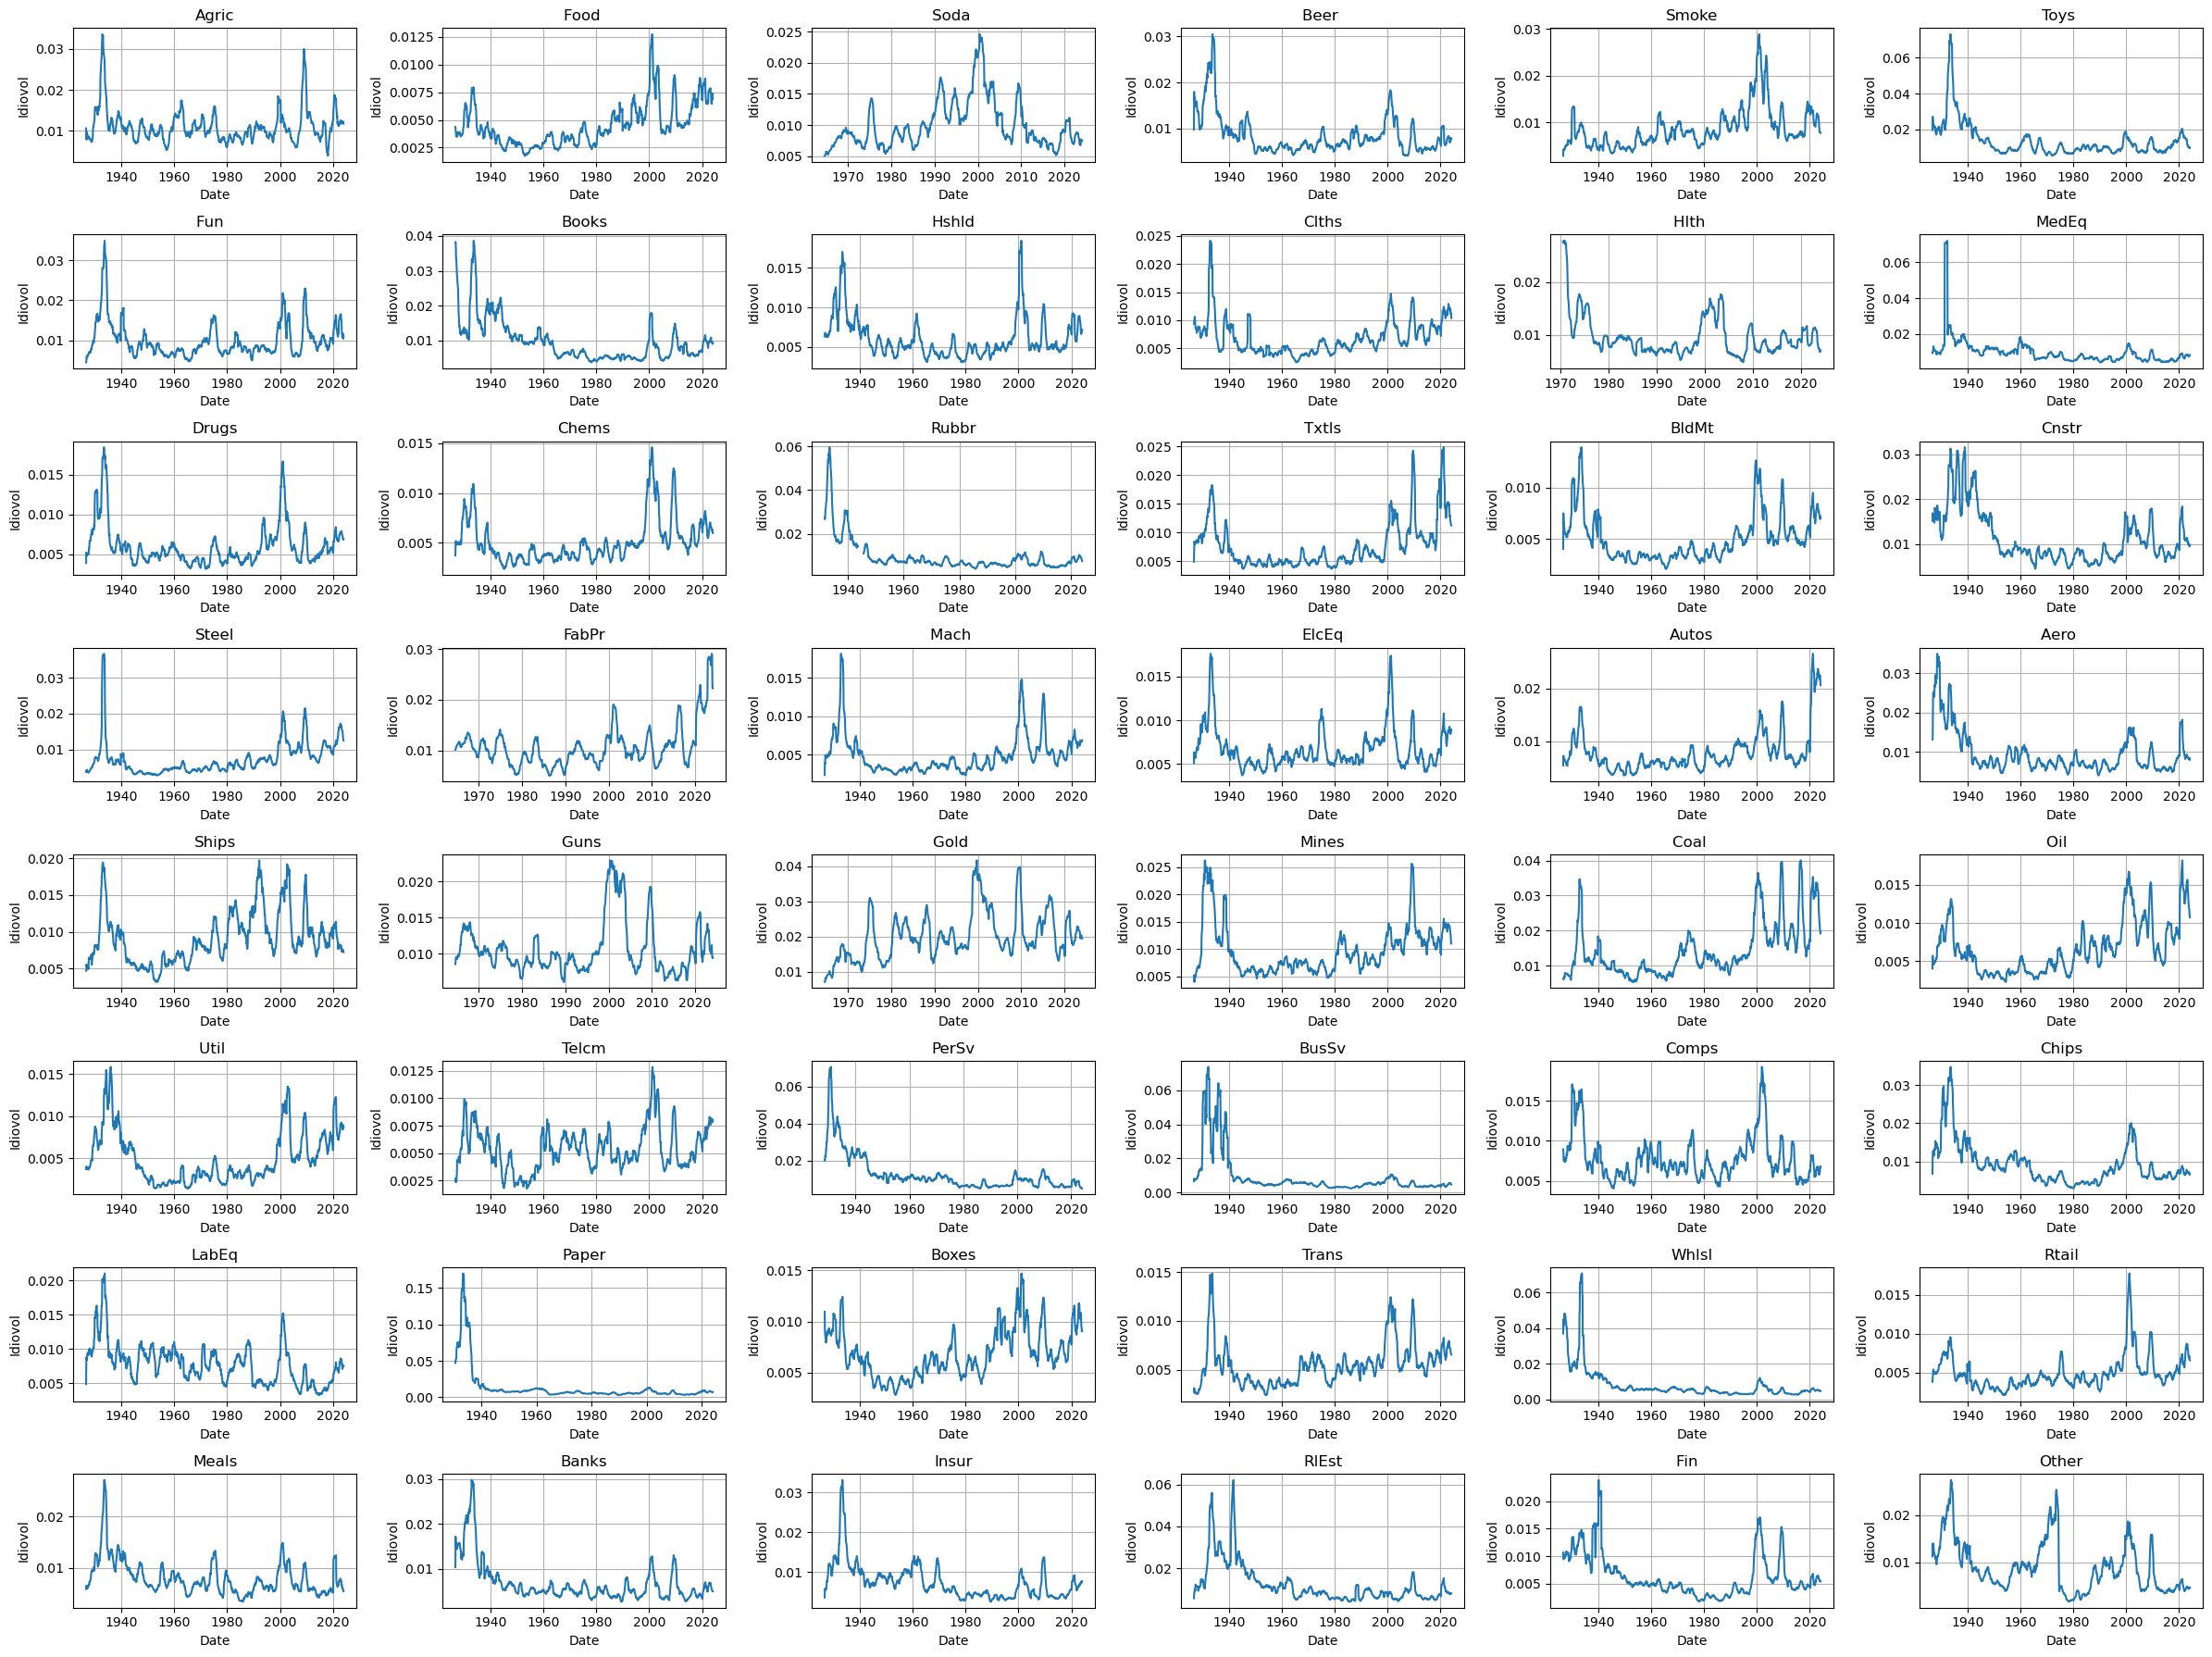

In [45]:
# Create a figure with 8 rows and 6 columns
fig, axes = plt.subplots(8, 6, figsize=(24, 18))
axes = axes.flatten()

# Plot each idiovol series
for i, column in enumerate(idio_vols.columns):
    axes[i].plot(idio_vols.index, idio_vols[column])
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Idiovol')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [46]:
mom = indu48_data.rolling(12).mean() # Calculate the momentum factor

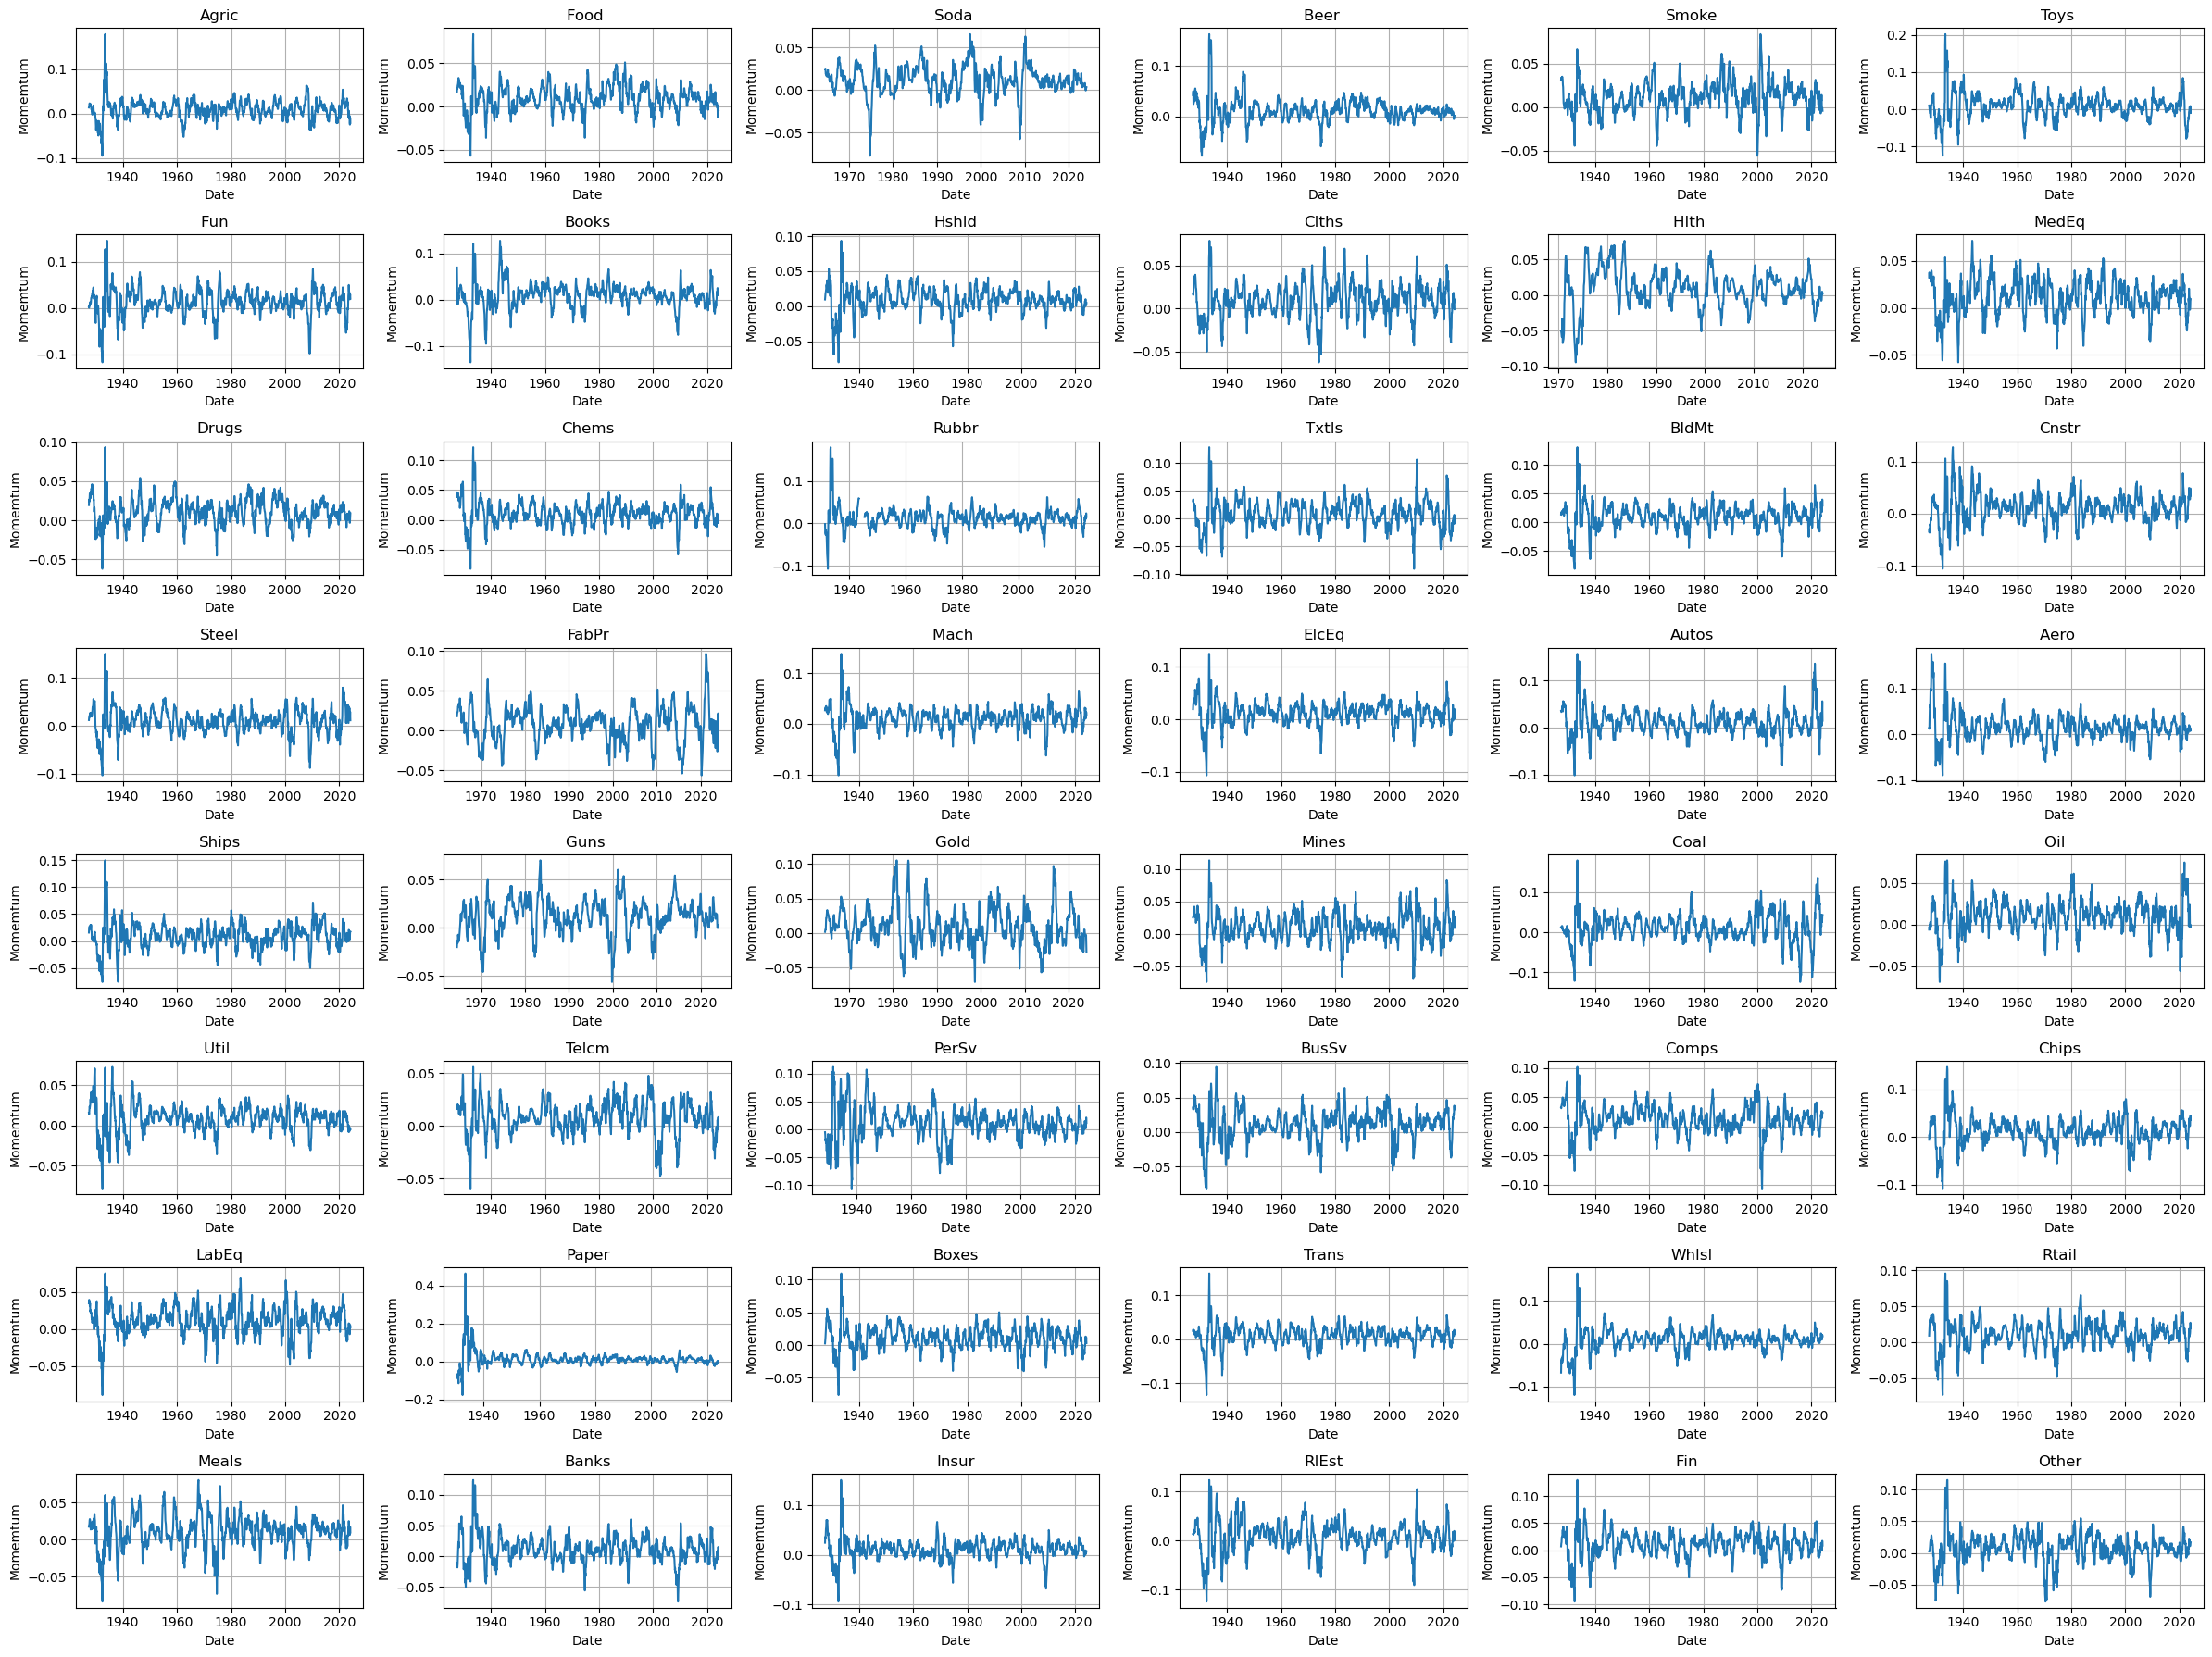

In [47]:
# Create a figure with 8 rows and 6 columns
fig, axes = plt.subplots(8, 6, figsize=(24, 18))
axes = axes.flatten()

# Plot each momentum series
for i, column in enumerate(mom.columns):
    axes[i].plot(mom.index, mom[column])
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Momemtum')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [48]:
indu48_data['july_year'] = np.select([indu48_data.index.month < 7], [indu48_data.index.year-1], default=indu48_data.index.year)
monthly_bm = indu48_data['july_year']
indu48_data.drop(columns=['july_year'], inplace=True)
monthly_bm = pd.merge(monthly_bm, bm48_data, left_on='july_year', right_index=True).drop('july_year', axis=1)

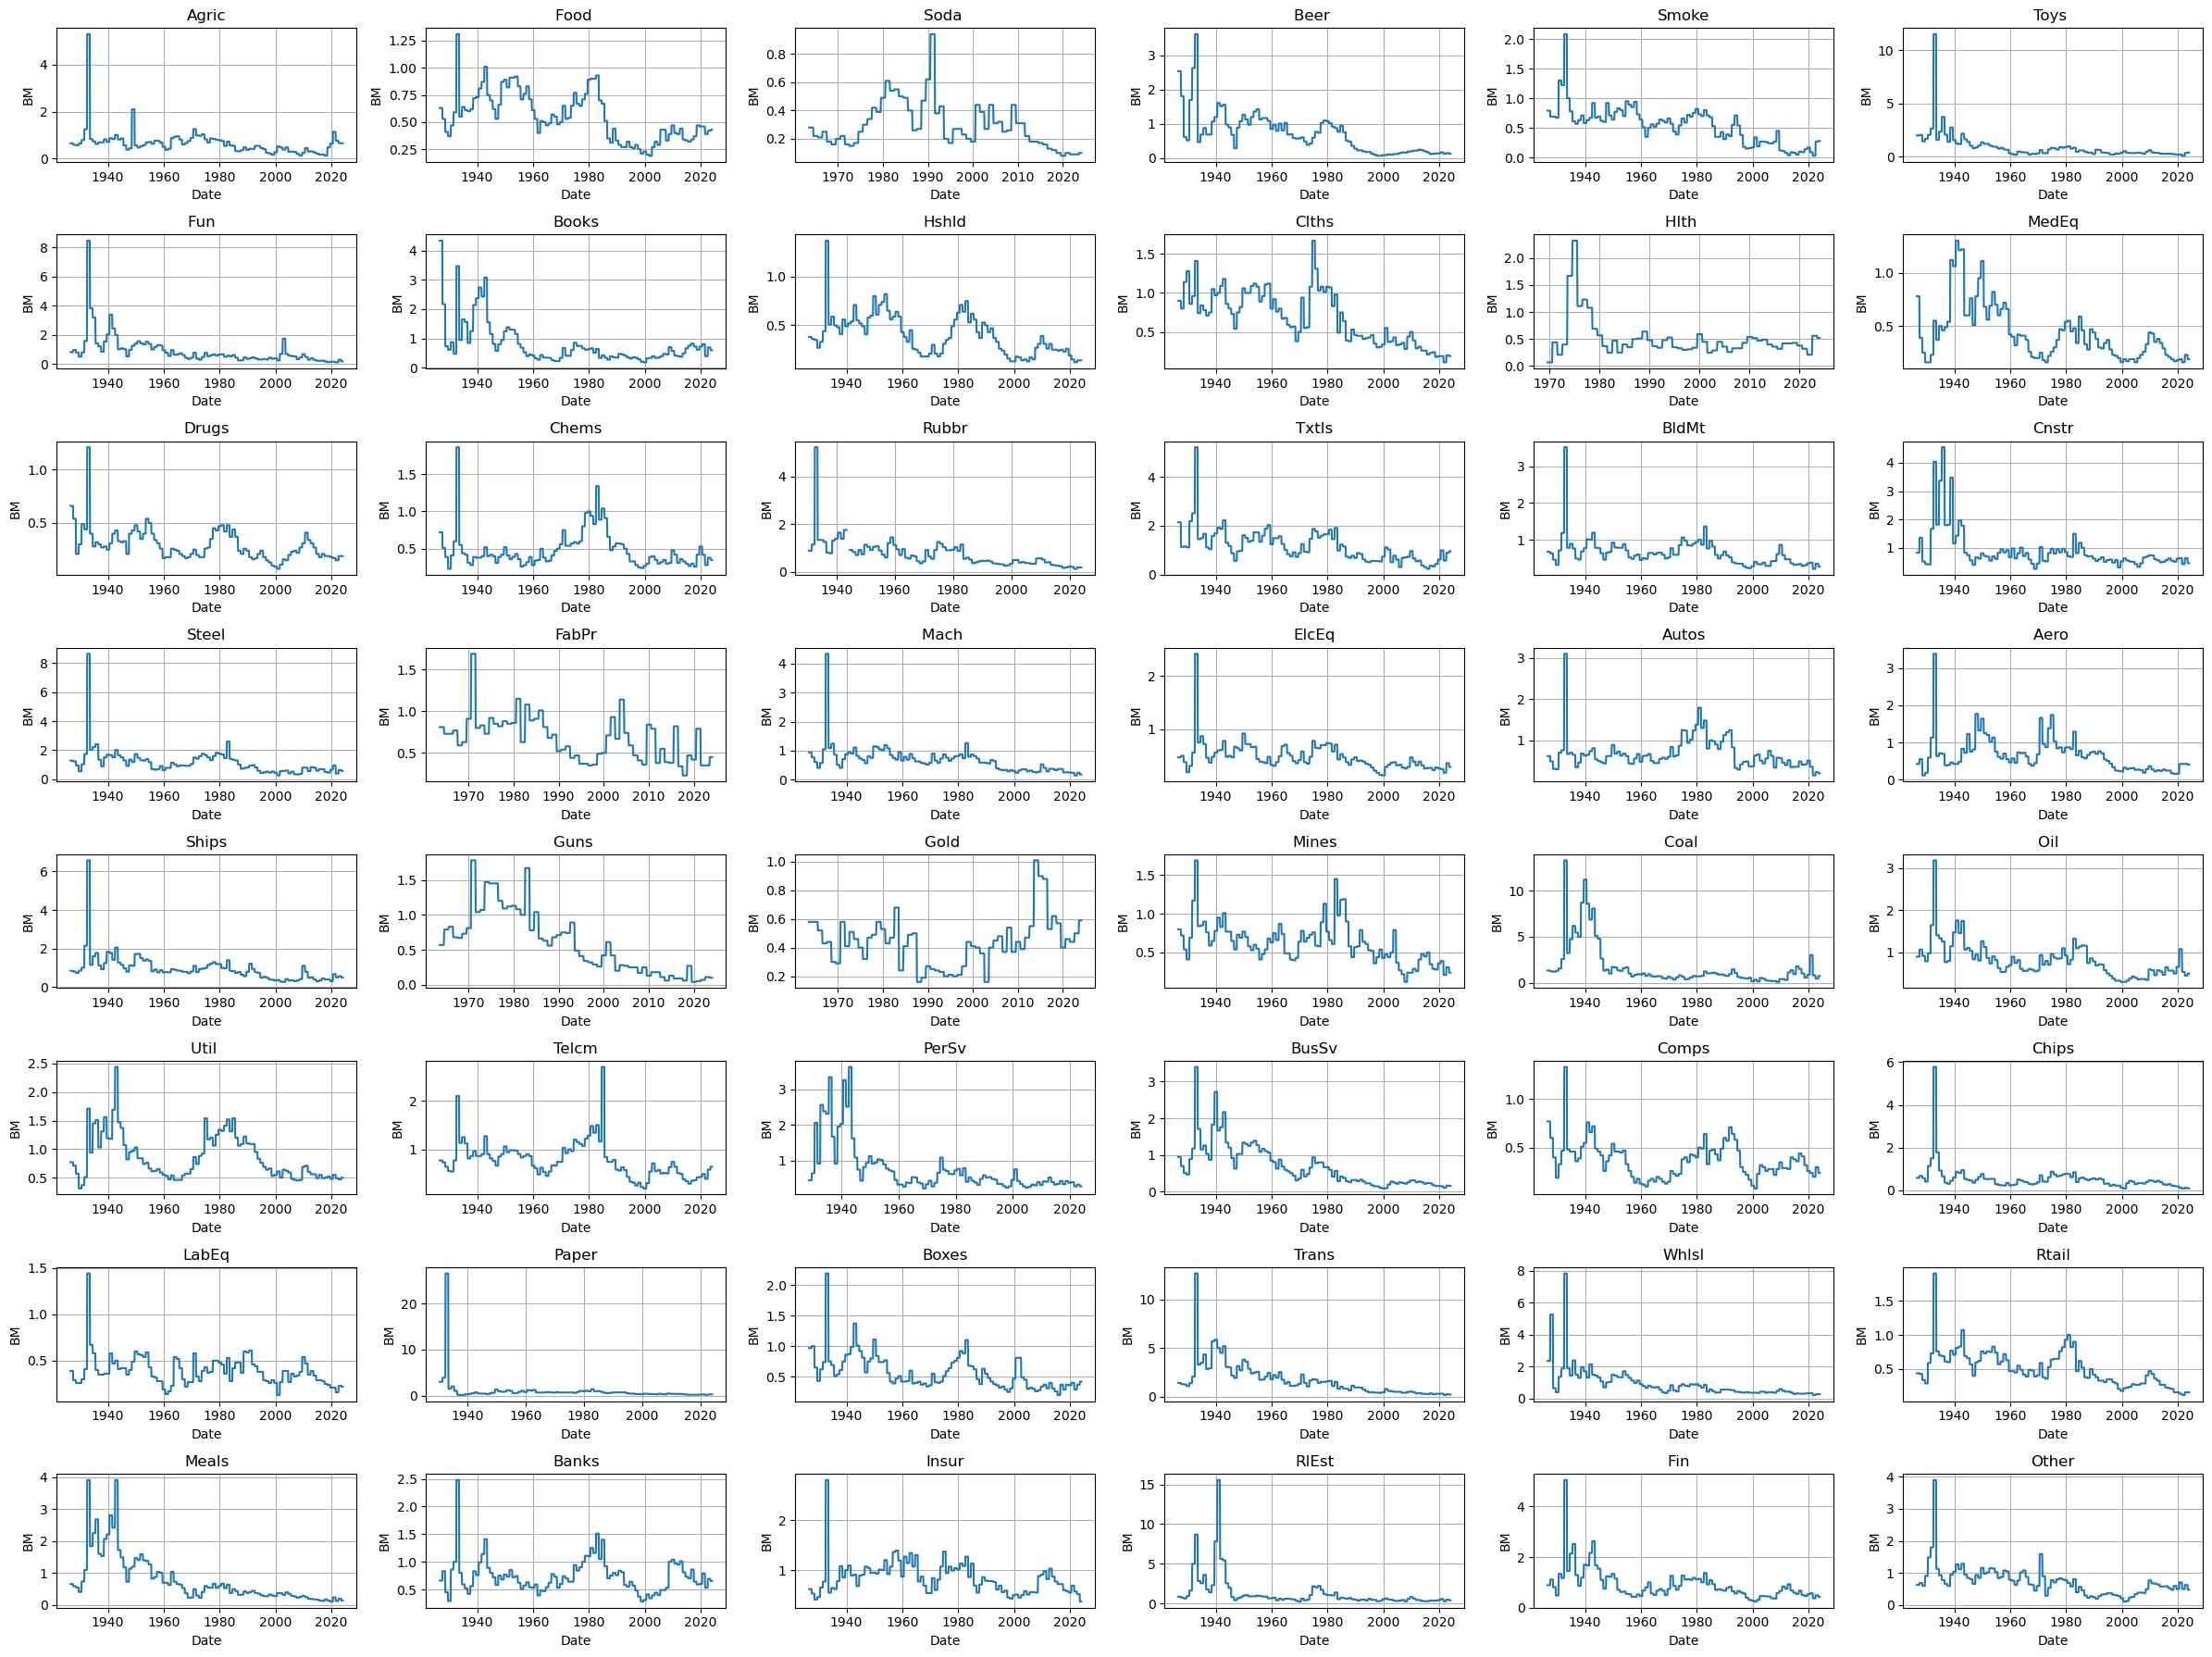

In [49]:
# Create a figure with 8 rows and 6 columns
fig, axes = plt.subplots(8, 6, figsize=(24, 18))
axes = axes.flatten()

# Plot each BM series
for i, column in enumerate(monthly_bm.columns):
    axes[i].plot(monthly_bm.index, monthly_bm[column])
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('BM')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [50]:
# Initialize the dictionaries to store the returns
ew_returns = {indu48_data.index[i]: [np.nan]*5 for i in range(1, len(indu48_data)-2)}
vw_returns = {indu48_data.index[i]: [np.nan]*5 for i in range(1, len(indu48_data)-2)}

# Loop over the months
for i in range(len(indu48_data)-2):
    
    charactestics = pd.concat([mktcap48_data.iloc[i], betas.iloc[i], idio_vols.iloc[i], mom.iloc[i], monthly_bm.iloc[i]], axis=1, keys=['Size', 'Beta', 'Idiovol', 'Mom', 'BM'])

    # Initialize the dictionary to store the returns
    rets = {charac: (np.nan, np.nan) for charac in charactestics.columns}

    # Loop over the characteristics
    for charac in charactestics.columns:
        # If the characteristic is not NaN try to sort the industries
        try:
            # Sort the industries based on the characteristic
            sorted = charactestics[charac].sort_values(ascending=False).dropna()
            
            # Get the long and short portfolios
            longs = sorted.iloc[:5].index.values
            shorts = sorted.iloc[-5:].index.values
        
            # Calculate the returns
            long_rets_ew = indu48_data.iloc[i+1][longs].mean() # Calculate the equal-weighted returns
            short_rets_ew = indu48_data.iloc[i+1][shorts].mean()
            long_rets_vw = np.average(indu48_data.iloc[i+1][longs], weights=mktcap48_data.iloc[i][longs]) # Calculate the value-weighted returns
            short_rets_vw = np.average(indu48_data.iloc[i+1][shorts], weights=mktcap48_data.iloc[i][shorts]) 
            ew = long_rets_ew - short_rets_ew
            vw = long_rets_vw - short_rets_vw
            rets[charac] = (ew, vw) # Store the returns
        except:
            rets[charac] = (np.nan, np.nan) # If the characteristic is NaN store NaN
    
    # Store all portfolio returns of the month in the dictionaries
    ew_returns[indu48_data.index[i+1]] = [x[0] for x in rets.values()]
    vw_returns[indu48_data.index[i+1]] = [x[1] for x in rets.values()]

In [51]:
# Convert the dictionaries to DataFrames
ew_returns_df = pd.DataFrame(ew_returns).T 
vw_returns_df = pd.DataFrame(vw_returns).T

ew_returns_df.columns = rets.keys()
vw_returns_df.columns = rets.keys()

Text(0, 0.5, 'Monthly Returns')

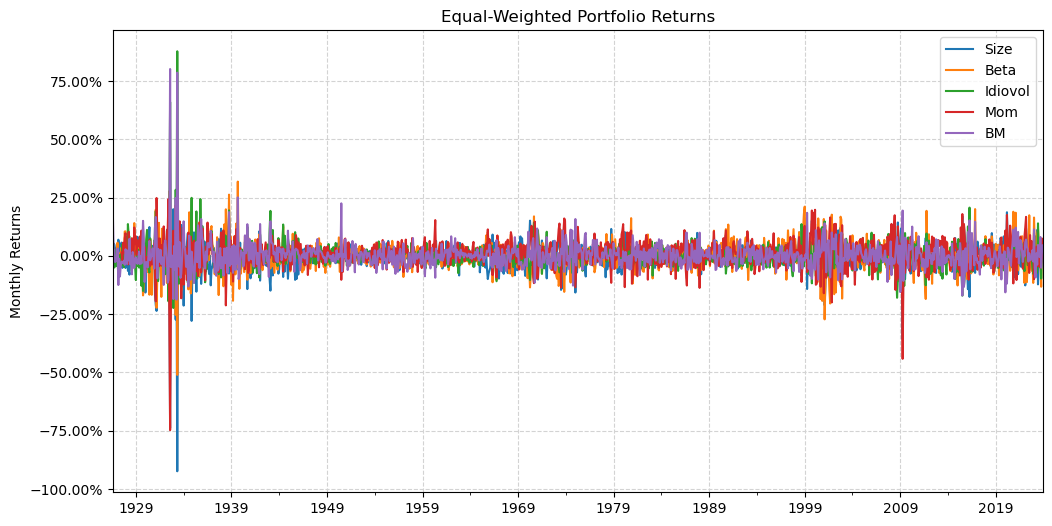

In [52]:
ew_returns_df.plot(title='Equal-Weighted Portfolio Returns', figsize=(12, 6))
plt.grid(color='lightgray', linestyle='--')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=2))
plt.ylabel('Monthly Returns')

Text(0, 0.5, 'Monthly Returns')

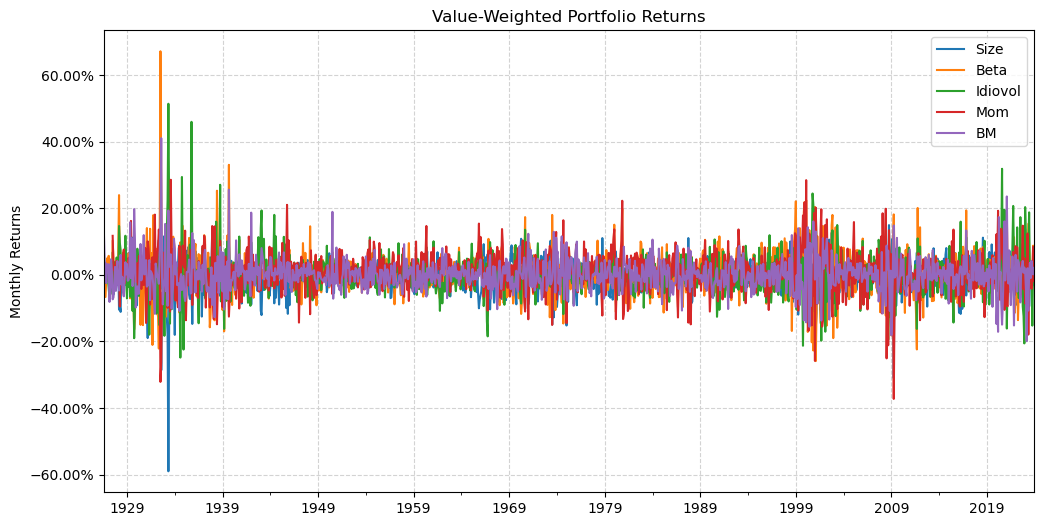

In [53]:
vw_returns_df.plot(title='Value-Weighted Portfolio Returns', figsize=(12, 6))
plt.grid(color='lightgray', linestyle='--')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=2))
plt.ylabel('Monthly Returns')

In [54]:
mydata1950 = [
    ['Size'] + list(get_stats(ew_returns_df, '1950', '2023', 'Size', ff_factors, four_ff_factors, five_ff_factors)),
    ['Beta'] + list(get_stats(ew_returns_df, '1950', '2023', 'Beta', ff_factors, four_ff_factors, five_ff_factors)),
    ['Idiovol'] + list(get_stats(ew_returns_df, '1950', '2023', 'Idiovol', ff_factors, four_ff_factors, five_ff_factors)),
    ['Mom'] + list(get_stats(ew_returns_df, '1950', '2023', 'Mom', ff_factors, four_ff_factors, five_ff_factors)),
    ['BM'] + list(get_stats(ew_returns_df, '1950', '2023', 'BM', ff_factors, four_ff_factors, five_ff_factors))
]
print("Equally-Weighted:", '\n', tabulate(mydata1950, headers=['Sharpe', '3 Factor Alpha', '4 Factor Alpha', '5 Factor Alpha']), '\n')

mydata1950 = [
    ['Size'] + list(get_stats(vw_returns_df, '1950', '2023', 'Size', ff_factors, four_ff_factors, five_ff_factors)),
    ['Beta'] + list(get_stats(vw_returns_df, '1950', '2023', 'Beta', ff_factors, four_ff_factors, five_ff_factors)),
    ['Idiovol'] + list(get_stats(vw_returns_df, '1950', '2023', 'Idiovol', ff_factors, four_ff_factors, five_ff_factors)),
    ['Mom'] + list(get_stats(vw_returns_df, '1950', '2023', 'Mom', ff_factors, four_ff_factors, five_ff_factors)),
    ['BM'] + list(get_stats(vw_returns_df, '1950', '2023', 'BM', ff_factors, four_ff_factors, five_ff_factors))
]
print("Value-Weighted:", '\n', tabulate(mydata1950, headers=['Sharpe', '3 Factor Alpha', '4 Factor Alpha', '5 Factor Alpha']))

Equally-Weighted: 
            Sharpe    3 Factor Alpha    4 Factor Alpha    5 Factor Alpha
-------  --------  ----------------  ----------------  ----------------
Size      -0.4087           -2.6364           -4.0284            0.4164
Beta      -0.1222           -6.7488           -5.0736           -1.8384
Idiovol   -0.3407           -6.6288           -6.2964           -8.1528
Mom        0.4494           11.1168           -0.1764            9.618
BM        -0.1623           -7.4616           -4.746            -6.6936 

Value-Weighted: 
            Sharpe    3 Factor Alpha    4 Factor Alpha    5 Factor Alpha
-------  --------  ----------------  ----------------  ----------------
Size      -0.4818           -3.8448           -5.3544           -0.7152
Beta      -0.1041           -6.4932           -5.3148           -1.7016
Idiovol   -0.271            -7.1424           -6.0816           -8.5248
Mom        0.3557            9.4164           -3.2088            5.2764
BM        -0.2292        

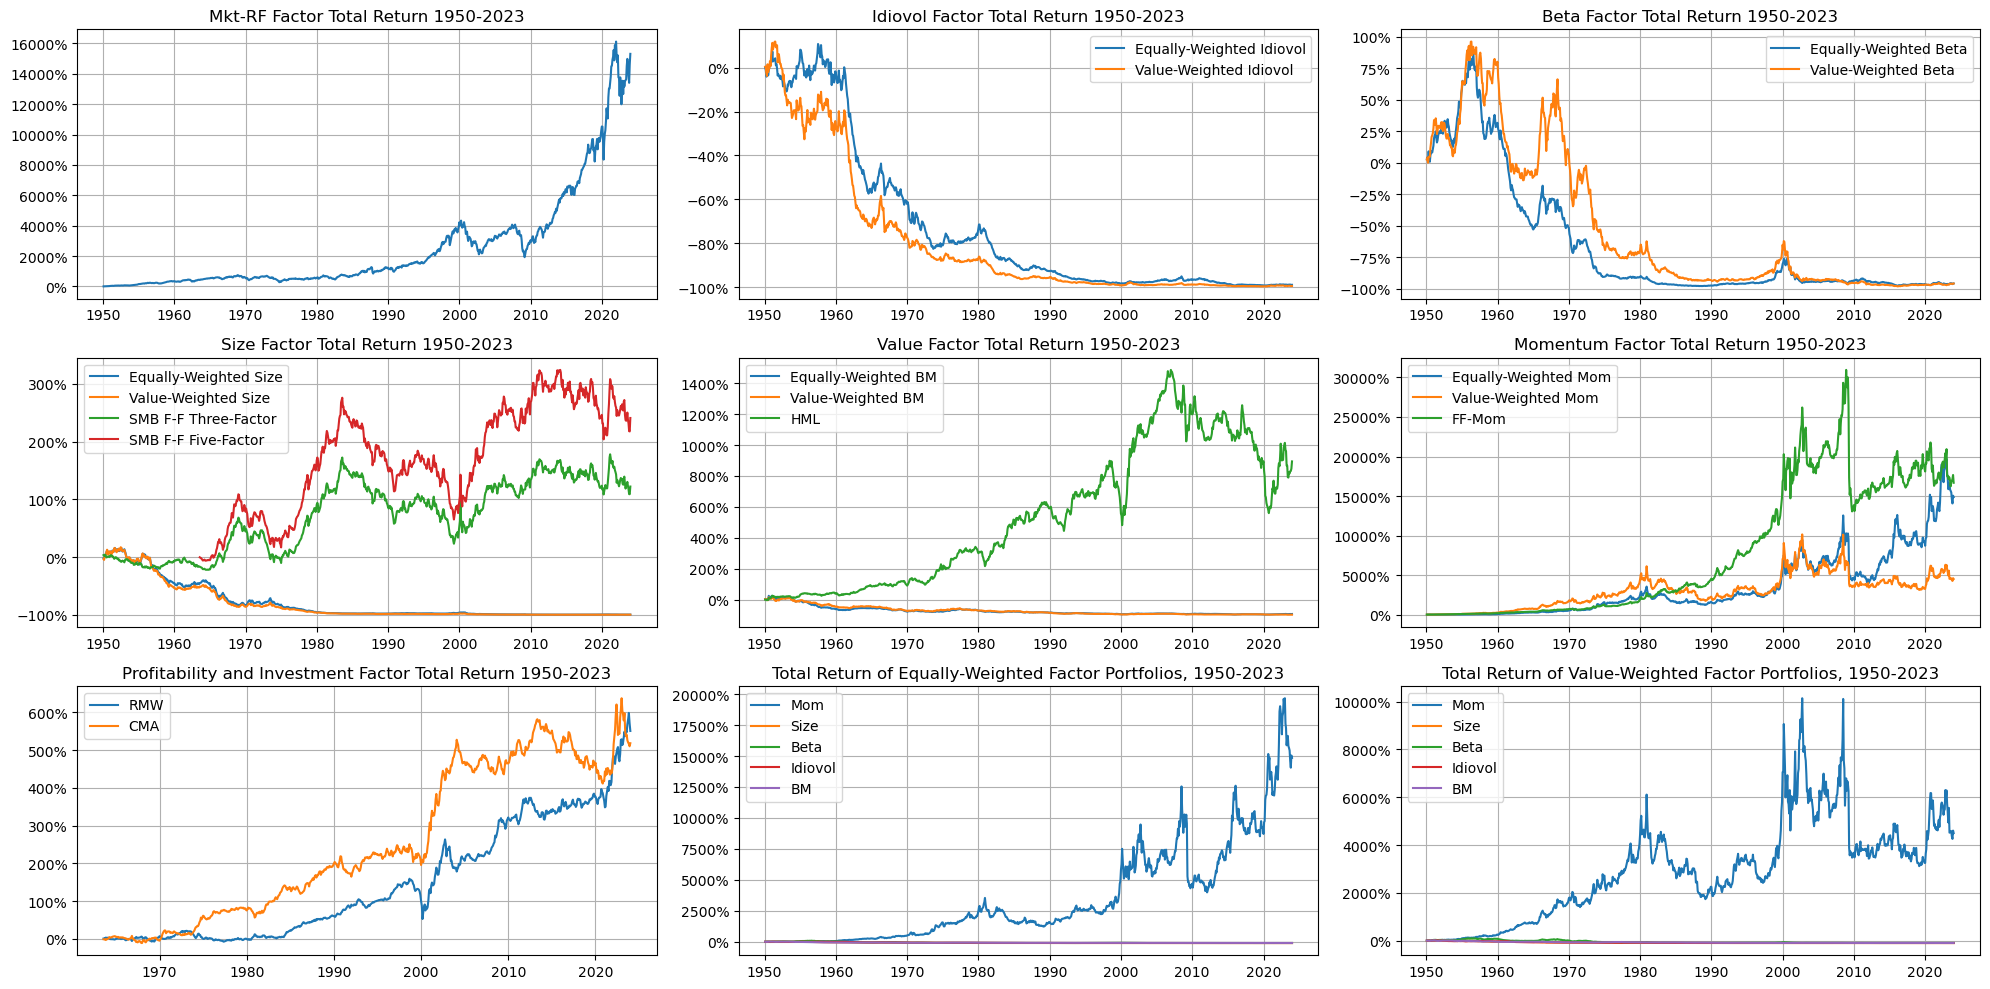

In [55]:
plot_portfolios(ew_returns_df, vw_returns_df, ff_factors, four_ff_factors, five_ff_factors, '1950', '2023')

In [56]:
mydata1990 = [
    ['Size'] + list(get_stats(ew_returns_df, '1990', '2023', 'Size', ff_factors, four_ff_factors, five_ff_factors)),
    ['Beta'] + list(get_stats(ew_returns_df, '1990', '2023', 'Beta', ff_factors, four_ff_factors, five_ff_factors)),
    ['Idiovol'] + list(get_stats(ew_returns_df, '1990', '2023', 'Idiovol', ff_factors, four_ff_factors, five_ff_factors)),
    ['Mom'] + list(get_stats(ew_returns_df, '1990', '2023', 'Mom', ff_factors, four_ff_factors, five_ff_factors)),
    ['BM'] + list(get_stats(ew_returns_df, '1990', '2023', 'BM', ff_factors, four_ff_factors, five_ff_factors))
]
print("Equally-Weighted:", '\n', tabulate(mydata1990, headers=['Sharpe', '3 Factor Alpha', '4 Factor Alpha', '5 Factor Alpha']), '\n')

mydata1990 = [
    ['Size'] + list(get_stats(vw_returns_df, '1990', '2023', 'Size', ff_factors, four_ff_factors, five_ff_factors)),
    ['Beta'] + list(get_stats(vw_returns_df, '1990', '2023', 'Beta', ff_factors, four_ff_factors, five_ff_factors)),
    ['Idiovol'] + list(get_stats(vw_returns_df, '1990', '2023', 'Idiovol', ff_factors, four_ff_factors, five_ff_factors)),
    ['Mom'] + list(get_stats(vw_returns_df, '1990', '2023', 'Mom', ff_factors, four_ff_factors, five_ff_factors)),
    ['BM'] + list(get_stats(vw_returns_df, '1990', '2023', 'BM', ff_factors, four_ff_factors, five_ff_factors))
]
print("Value-Weighted:", '\n', tabulate(mydata1990, headers=['Sharpe', '3 Factor Alpha', '4 Factor Alpha', '5 Factor Alpha']))

Equally-Weighted: 
            Sharpe    3 Factor Alpha    4 Factor Alpha    5 Factor Alpha
-------  --------  ----------------  ----------------  ----------------
Size      -0.2269           -1.5108           -3.1188            2.232
Beta       0.1826           -2.6316           -0.8184            3.5568
Idiovol   -0.223            -5.2068           -4.4856           -7.0188
Mom        0.402            12.1152            2.8944           10.3944
BM        -0.0554           -4.6692           -2.5416           -4.524 

Value-Weighted: 
            Sharpe    3 Factor Alpha    4 Factor Alpha    5 Factor Alpha
-------  --------  ----------------  ----------------  ----------------
Size      -0.2854           -2.6664           -4.2516            1.0956
Beta       0.0679           -5.2968           -3.5784            1.29
Idiovol   -0.131            -5.3436           -3.4908           -7.7448
Mom        0.2056            7.7052           -2.574             4.6296
BM        -0.1823           

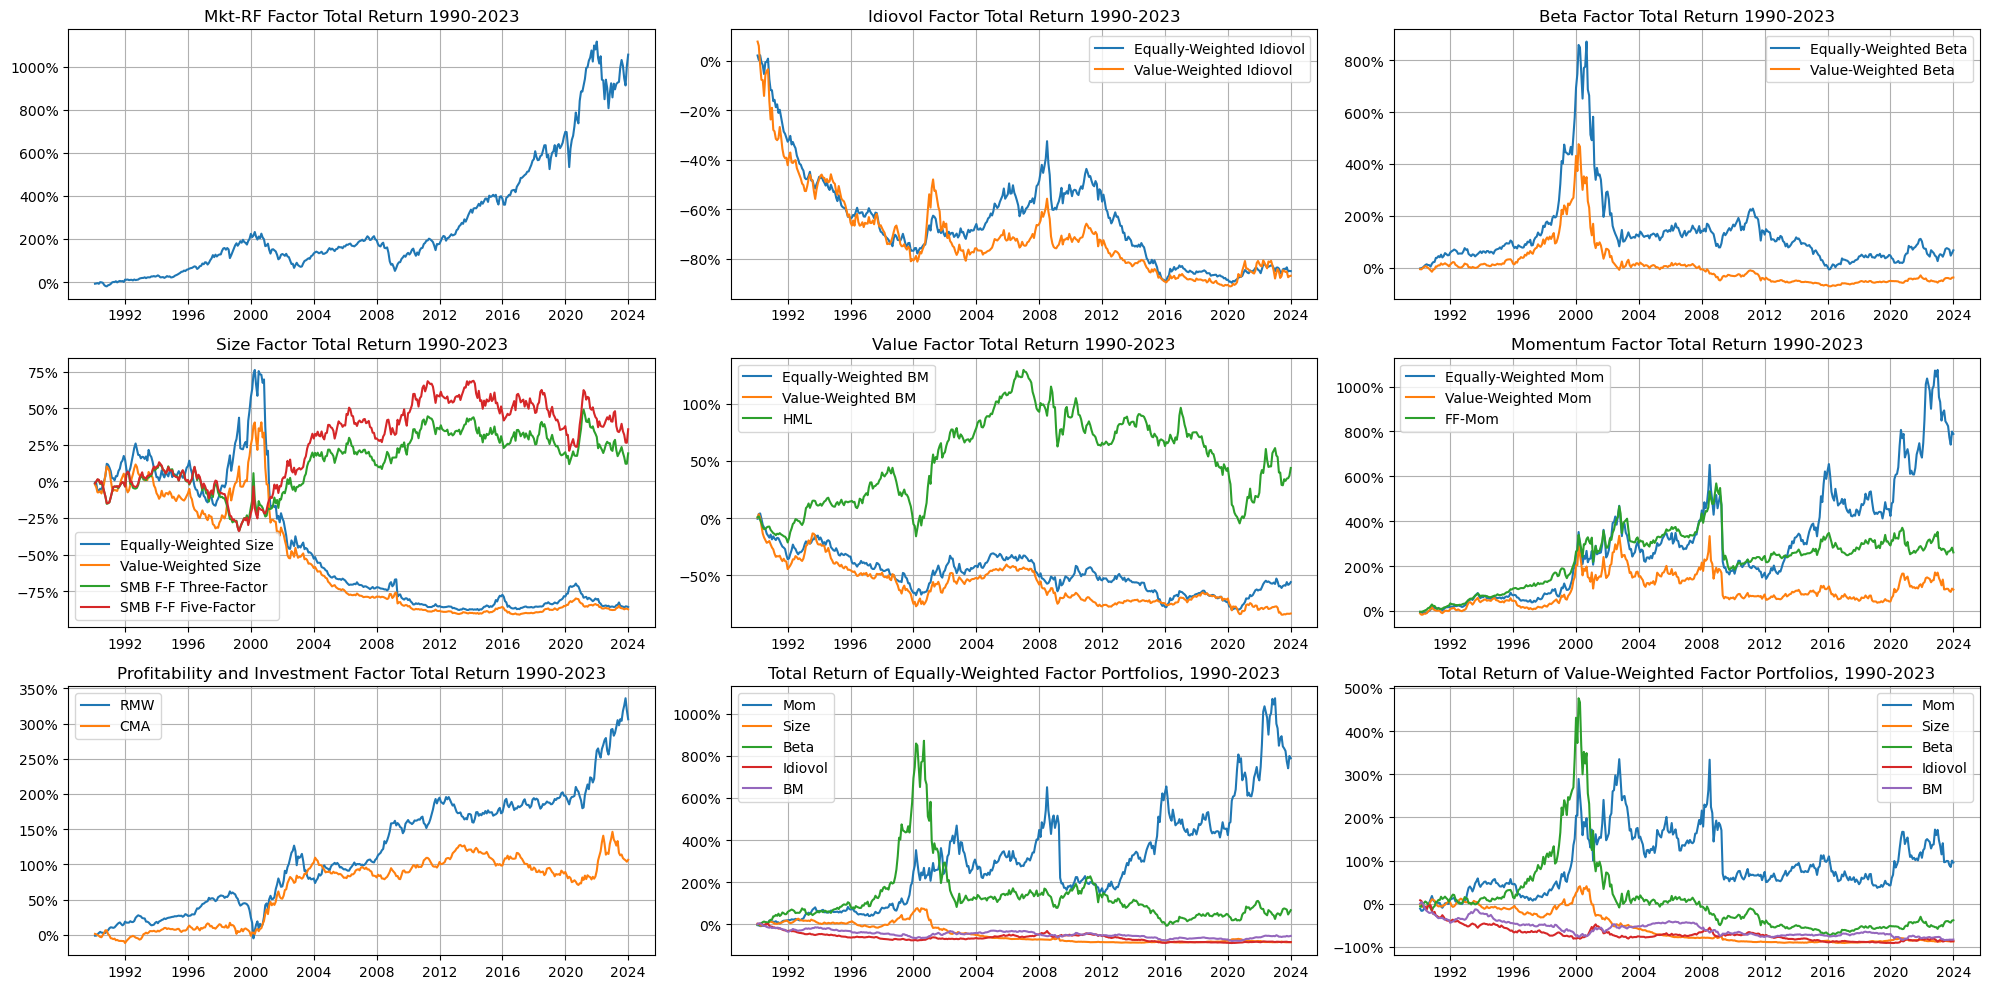

In [57]:
plot_portfolios(ew_returns_df, vw_returns_df, ff_factors, four_ff_factors, five_ff_factors, '1990', '2023')

In [58]:
mydata2000 = [
    ['Size'] + list(get_stats(ew_returns_df, '2000', '2023', 'Size', ff_factors, four_ff_factors, five_ff_factors)),
    ['Beta'] + list(get_stats(ew_returns_df, '2000', '2023', 'Beta', ff_factors, four_ff_factors, five_ff_factors)),
    ['Idiovol'] + list(get_stats(ew_returns_df, '2000', '2023', 'Idiovol', ff_factors, four_ff_factors, five_ff_factors)),
    ['Mom'] + list(get_stats(ew_returns_df, '2000', '2023', 'Mom', ff_factors, four_ff_factors, five_ff_factors)),
    ['BM'] + list(get_stats(ew_returns_df, '2000', '2023', 'BM', ff_factors, four_ff_factors, five_ff_factors)),
]
print("Equally-Weighted:", '\n', tabulate(mydata2000, headers=['Sharpe', '3 Factor Alpha', '4 Factor Alpha', '5 Factor Alpha']), '\n')

mydata2000 = [
    ['Size'] + list(get_stats(vw_returns_df, '2000', '2023', 'Size', ff_factors, four_ff_factors, five_ff_factors)),
    ['Beta'] + list(get_stats(vw_returns_df, '2000', '2023', 'Beta', ff_factors, four_ff_factors, five_ff_factors)),
    ['Idiovol'] + list(get_stats(vw_returns_df, '2000', '2023', 'Idiovol', ff_factors, four_ff_factors, five_ff_factors)),
    ['Mom'] + list(get_stats(vw_returns_df, '2000', '2023', 'Mom', ff_factors, four_ff_factors, five_ff_factors)),
    ['BM'] + list(get_stats(vw_returns_df, '2000', '2023', 'BM', ff_factors, four_ff_factors, five_ff_factors))
]
print("Value-Weighted:", '\n', tabulate(mydata2000, headers=['Sharpe', '3 Factor Alpha', '4 Factor Alpha', '5 Factor Alpha']))

Equally-Weighted: 
            Sharpe    3 Factor Alpha    4 Factor Alpha    5 Factor Alpha
-------  --------  ----------------  ----------------  ----------------
Size      -0.4099           -4.4148           -5.3268            0.1128
Beta      -0.1307          -10.0068           -8.4504           -3.1896
Idiovol    0.0045           -1.7316           -1.5048           -4.2888
Mom        0.2872           10.0104            4.4964            5.9748
BM         0.1469           -1.9296           -0.6648           -2.706 

Value-Weighted: 
            Sharpe    3 Factor Alpha    4 Factor Alpha    5 Factor Alpha
-------  --------  ----------------  ----------------  ----------------
Size      -0.4472           -5.0868           -5.9724           -0.5124
Beta      -0.2111          -11.742           -10.2804           -3.7512
Idiovol    0.064            -1.3236           -0.606            -3.7836
Mom        0.0654            4.3764           -1.6584           -1.0644
BM         0.0171        

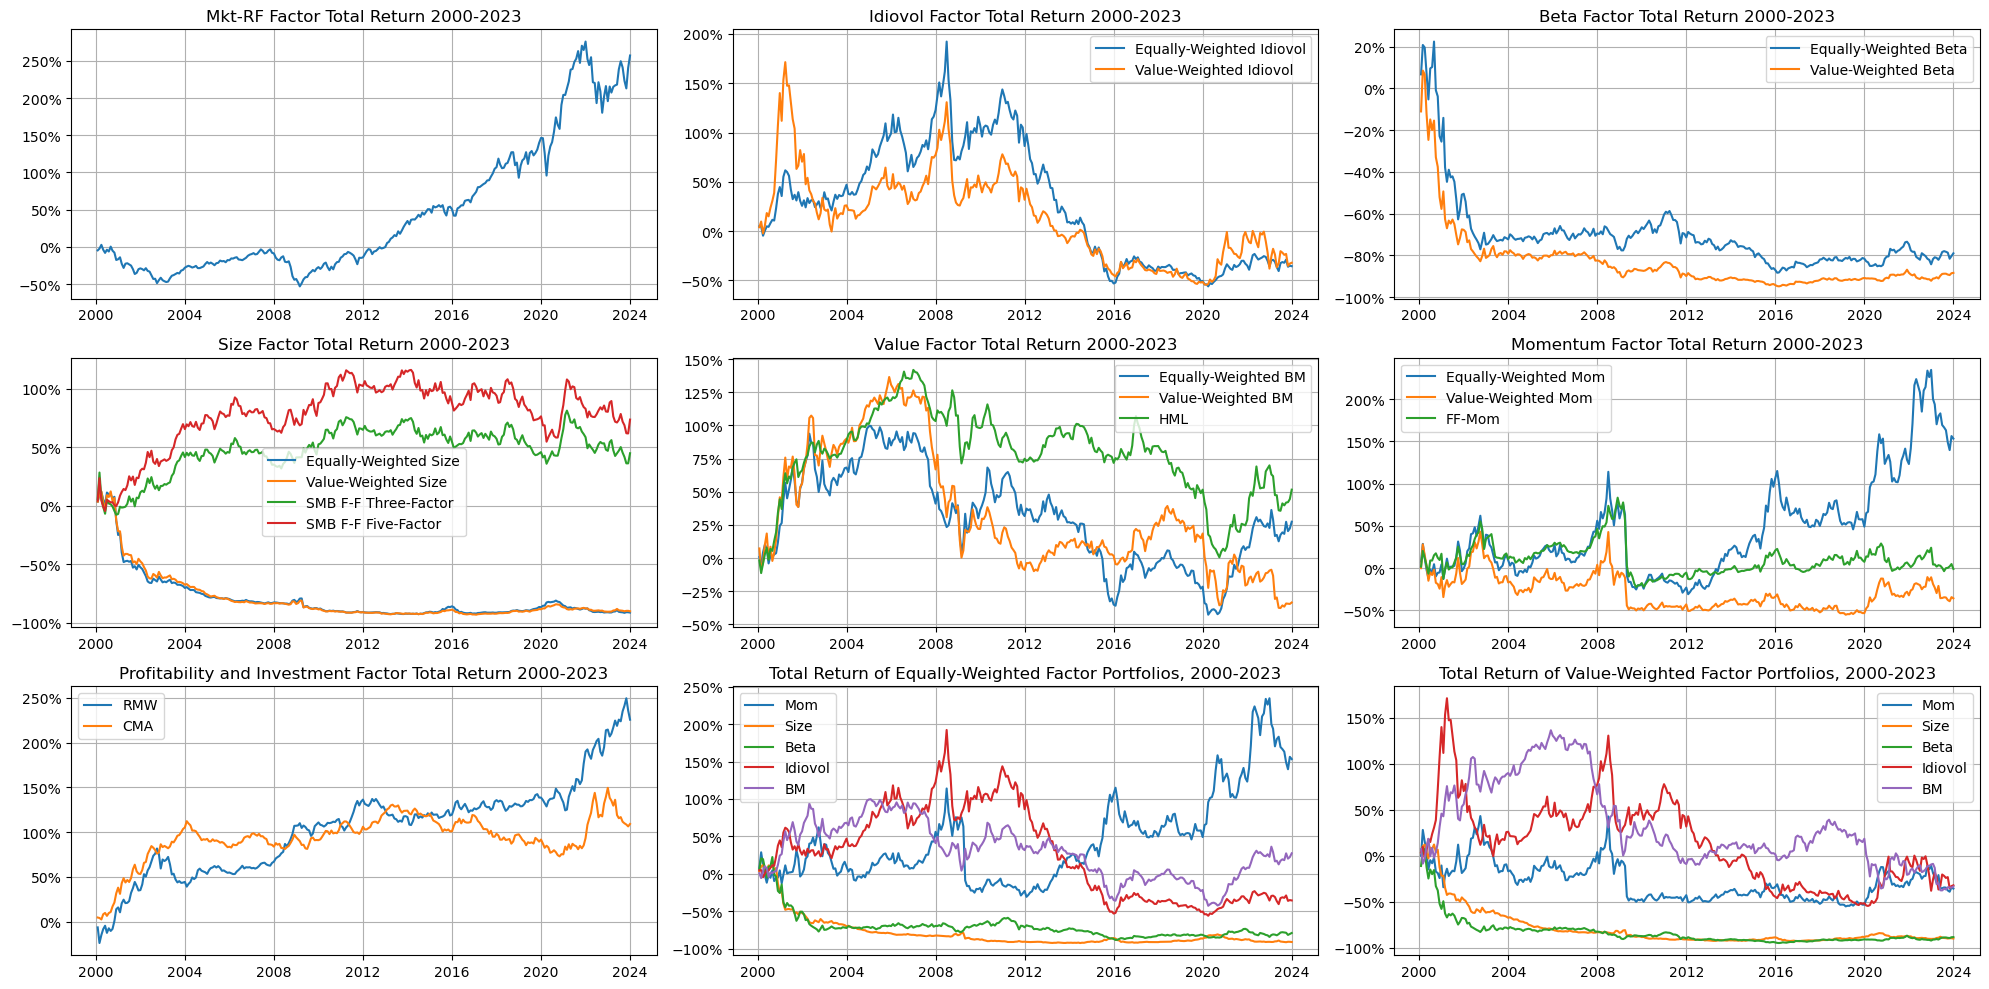

In [59]:
plot_portfolios(ew_returns_df, vw_returns_df, ff_factors, four_ff_factors, five_ff_factors, '2000', '2023')

In [94]:
# Correlation matrix of the size returns
sizes = pd.merge(ew_returns_df['Size'], vw_returns_df['Size'], left_index=True, right_index=True).merge(ff_factors['SMB'], left_index=True, right_index=True).merge(five_ff_factors['SMB'], left_index=True, right_index=True)
sizes.columns = ['EW Size', 'VW Size', '3 Factor SMB', '5 Factor SMB']
sizes[['EW Size', 'VW Size']] = sizes[['EW Size', 'VW Size']].sub(ff_factors['RF'].loc[sizes.index], axis=0)
sizes.loc['1990':'2023'].corr().round(2)

EW Size  VW Size  3 Factor SMB  5 Factor SMB
EW Size          1.00     0.95         -0.29         -0.41
VW Size          0.95     1.00         -0.26         -0.38
3 Factor SMB    -0.29    -0.26          1.00          0.97
5 Factor SMB    -0.41    -0.38          0.97          1.00

# Part C

## Data Prep

In [60]:
# Load the data
indu48_data = pd.read_csv(indu48_data_file, skiprows=11, index_col=0, nrows=1171)
daily_indu48_data = pd.read_csv(daily_indu48_file, skiprows=9, index_col=0, nrows=25670, low_memory=False)
size48_data = pd.read_csv(indu48_data_file, skiprows=3738, index_col=0, nrows=1171)
n_firms48_data = pd.read_csv(indu48_data_file, skiprows=2563, index_col=0, nrows=1171)
mktcap48_data = n_firms48_data.mul(size48_data) # Market capitalization defined as the product of the average number of firms and the average size of the firms in the 48 industries
bm48_data = pd.read_csv(indu48_data_file, skiprows=4913, index_col=0, nrows=98)
RF = pd.read_csv(ff_factors_file, skiprows=3, index_col=0, nrows=1171)['RF']

In [61]:
# Make sure we have a datimeindex
indu48_data.index = pd.to_datetime(indu48_data.index, format='%Y%m') + pd.offsets.MonthEnd(0)
mktcap48_data.index = pd.to_datetime(mktcap48_data.index, format='%Y%m') + pd.offsets.MonthEnd(0)
RF.index = pd.to_datetime(RF.index, format='%Y%m') + pd.offsets.MonthEnd(0)

In [62]:
# Replace -99.99 (or -0.0 for mktcap) with NaN
indu48_data.replace(-99.99, np.nan, inplace=True)
bm48_data.replace(-99.99, np.nan, inplace=True)
mktcap48_data.replace(-0.0, np.nan, inplace=True)
RF.replace(-99.99, np.nan, inplace=True)

In [63]:
# Convert to decimal
indu48_data = indu48_data / 100
RF = RF / 100

In [64]:
# Make sure we have a monthly frequency for BM, keeping it constant from July to June
indu48_data['july_year'] = np.select([indu48_data.index.month < 7], [indu48_data.index.year-1], default=indu48_data.index.year)
monthly_bm = indu48_data['july_year']
indu48_data.drop(columns=['july_year'], inplace=True)
monthly_bm = pd.merge(monthly_bm, bm48_data, left_on='july_year', right_index=True).drop('july_year', axis=1)

In [65]:
mom = indu48_data.rolling(12).mean() # Calculate the momentum factor

In [66]:
#Standardize the characteristics data, we shift by one month to avoid look-ahead bias (we use the data from the previous month to compute the weights for the current month)
monthly_bm_hat = monthly_bm.apply(lambda x: (x - x.mean()) / x.std(), axis=1).shift(1)
mktcap48_data_hat = mktcap48_data.apply(lambda x: (x - x.mean()) / x.std(), axis=1).shift(1)
mom_hat = mom.apply(lambda x: (x - x.mean()) / x.std(), axis=1).shift(1)
mktcap_weights = mktcap48_data.apply(lambda x: x / x.sum(), axis=1).shift(1)
n_indu = mktcap_weights.count(axis=1).shift(1)

# To simplify formulas
rets_ = indu48_data

## Estimation of parameters

CRRA Utility function: $\frac{W^{1 - \gamma}}{(1 - \gamma)}$, where W is the Wealth

In [67]:
crra = lambda x: ((1 + x)**(-4)) / (-4) # CRRA utility function with risk aversion parameter = 5, we do 1 + x to convert the returns to wealth 

def obj_fun(theta, *args):
    # Define the objective function
    mkt_weights, rets, size, bm, mom, Nt = args
    theta1, theta2, theta3 = theta
    weights_count_inv = 1 / Nt
    weights = (mkt_weights + (theta1 * size + theta2 * bm + theta3 * mom).fillna(0).mul(weights_count_inv, axis=0)) # Calculate the weights
    weighted_rets = (weights * rets).sum(axis=1) # Calculate the weighted returns
    crra_values = crra(weighted_rets) # Calculate the CRRA utility values
    return -(crra_values.mean()) # Return the negative of the mean CRRA utility value to maximize it

In [68]:
# Dates for the out-of-sample period
idx = indu48_data.index
dates = idx[idx >= "1973-12-31"]
dates = dates[dates.month == 12]
start_date = '1927-07-31'

In [69]:
params = {}
# Optimize the objective function for each date in the out-of-sample period
for date in dates:  
    # Get the data for the date
    weights = mktcap_weights.loc[start_date:date] 
    rets = rets_.loc[start_date:date] 
    size = mktcap48_data_hat.loc[start_date:date]
    bm = monthly_bm_hat.loc[start_date:date]
    mom = mom_hat.loc[start_date:date]
    Nt = n_indu.loc[start_date:date]

    # Optimize the objective function
    res = minimize(obj_fun, [1.5, 1.5, 1.5], args=(weights, rets, size, bm, mom, Nt), method='Nelder-Mead', tol=1e-3)

    # Save the parameters
    params[date] = res.x

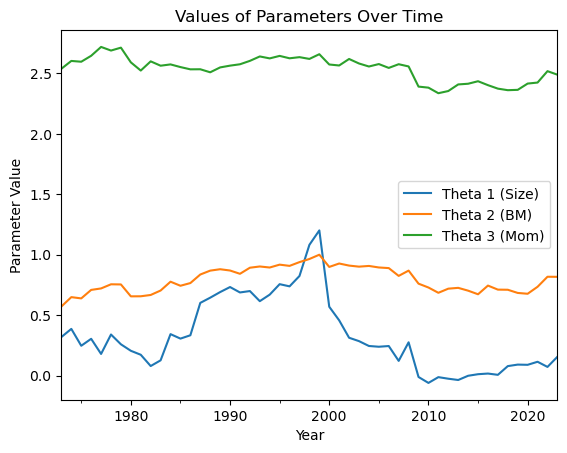

In [70]:
pd.DataFrame(params).T.plot(title="Values of Parameters Over Time")
plt.legend(['Theta 1 (Size)', 'Theta 2 (BM)', 'Theta 3 (Mom)'])
plt.ylabel('Parameter Value')
plt.xlabel('Year')
plt.savefig('Figures/Part C/Parameters.png', bbox_inches='tight')
plt.show()

## Parametric Portfolio Returns

In [71]:
parametric_rets = pd.Series() # Initialize the DataFrame to store the parametric returns
for date, param in params.items():
    # Calculate the parametric returns for each date (we do +1 for the year since we computed the parameters at the end of December and we want to use them for the next year)
    year = str(date.date().year + 1)
    if year == '2024':
        break

    # Get the data for the year
    weights = mktcap_weights.loc[year] 
    size = mktcap48_data_hat.loc[year]
    bm = monthly_bm_hat.loc[year]
    mom = mom_hat.loc[year]
    Nt = n_indu.loc[year]
    weights_count_inv = 1 / Nt

    # Calculate the weights
    weights = (weights + (param[0] * size + param[1] * bm + param[2] * mom).fillna(0).mul(weights_count_inv, axis=0))

    # Keep only non-zero weights and normalize the weights to sum to 1
    weights[weights < 0] = 0
    row_sums = weights.sum(axis=1)
    normalized_weights = weights.div(row_sums, axis=0)
    weighted_rets = (normalized_weights * rets_.loc[year]).sum(axis=1)

    # Append the parametric returns to the DataFrame
    if parametric_rets.empty:
        parametric_rets = weighted_rets
    else:
        parametric_rets = pd.concat([parametric_rets, weighted_rets], axis=0)

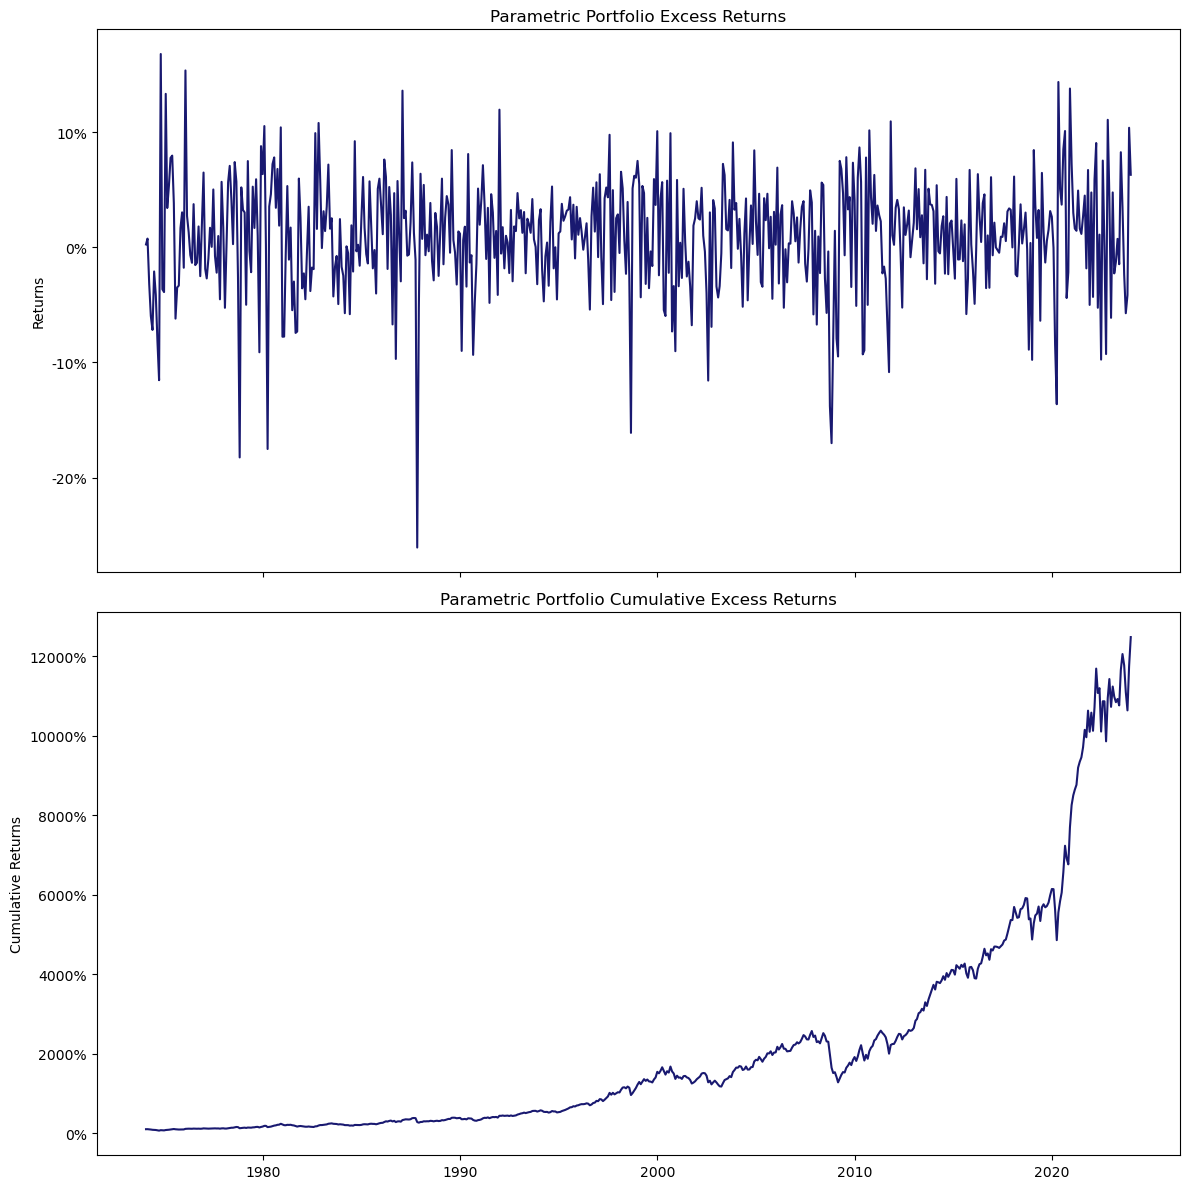

In [72]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

excess_rets = parametric_rets - RF.loc[parametric_rets.index]

# Plot Parametric Portfolio Returns
axes[0].plot(excess_rets, color= 'midnightblue')
axes[0].set_title("Parametric Portfolio Excess Returns")
axes[0].set_ylabel("Returns")
axes[0].yaxis.set_major_formatter(lambda x, _: '{:.0%}'.format(x))

# Plot Parametric Portfolio Cumulative Returns
axes[1].plot((excess_rets + 1).cumprod(), color= 'midnightblue')
axes[1].set_title("Parametric Portfolio Cumulative Excess Returns")
axes[1].set_ylabel("Cumulative Returns")
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

plt.tight_layout()
plt.savefig('Figures/Part C/Parametric_Portfolio_Returns.png', bbox_inches='tight')
plt.show()


In [73]:
# Calculate the performance metrics
excess_rets = parametric_rets - RF.loc[parametric_rets.index]
annualized_geometric_returns = (excess_rets + 1).prod() ** (12 / len(excess_rets)) - 1
annualized_arithmetic_returns = excess_rets.mean() * 12
annualized_volatility = excess_rets.std() * np.sqrt(12)
sharpe_ratio = annualized_arithmetic_returns / annualized_volatility

table = pd.DataFrame({
    'Annualized Geometric Returns': annualized_geometric_returns * 100,
    'Annualized Arithmetic Returns': annualized_arithmetic_returns * 100,
    'Annualized Volatility': annualized_volatility * 100,
    'Sharpe Ratio': sharpe_ratio
}, index=['Parametric Portfolio'])

table.round(4).T

Parametric Portfolio
Annualized Geometric Returns                10.1363
Annualized Arithmetic Returns               11.1706
Annualized Volatility                       17.0566
Sharpe Ratio                                 0.6549